### Introducción:
En este notebook se encuentra detallado el proceso de ETL y EDA completos, con su paso a paso, de la data que se extrajo de [Secretaría de Transporte y Obras Públicas](https://data.buenosaires.gob.ar/organization/transporte-y-obras-publicas) sobre los siniestros viales 2016 al 2021.

# ETL y EDA de hechos

### Comenzamos importando las librerías necesarias

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%load_ext autoreload
%autoreload 2
import funciones

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1.1 Cargamos el dataset homicidios a un pandas dataframe para comenzar el ETL

In [120]:
# Cargamos el dataset con sus diferentes páginas a pandas
sheets_to_load = ["HECHOS", "VICTIMAS"]
# Cargamos las diferentes hojas del excel a un diccionario 
sheets_data = pd.read_excel(r'data\homicidios.xlsx ', sheet_name=sheets_to_load)

# Accedemos individualmente a los DataFrames usando el nombre de la pagina como fuente
hechos_df = sheets_data["HECHOS"]
victimas_df = sheets_data["VICTIMAS"]

In [121]:
hechos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [122]:
hechos_df.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [75]:
hechos_df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')


| Nombre_Columna        | Rename                      | Descripcion del dato y caracteristicas                                                          | Datatype |
| --------------------- | --------------------------- | ----------------------------------------------------------------------------------------------- | -------- |
| ID                    | id_hecho                    | es el identificador único del evento (siniestro)                                                | str      |
| N_VICTIMAS            | cant_victimas               | cantidad de víctimas                                                                            | int      |
| FECHA                 | fecha | fecha en formato dd/mm/aaaa                                                                     | datetime |
| AAAA                  | año                         | es el año de ocurrencia del siniestro                                                           | int      |
| MM                    | mes                         | es el mes de ocurrencia del siniestro                                                           | int      |
| DD                    |dia                    | es nro del dia de ocurrencia del siniestro (siniestro)                                          | int      |
| HORA                  | hora                        | es la hora de ocurrencia del siniestro (siniestro)                                              | HH:MM:SS |
| HH                    | hora_int                    | es la hora entero de ocurrencia del siniestro (siniestro)                                       | int      |
| LUGAR_DEL_HECHO       | dir                         | es la direccion donde ocurrió del evento (siniestro)                                            | string   |
| TIPO_DE_CALLE         | tipo_calle                  | Clasificación: calle, Avenida, Autopista                                                        | string   |
| Calle                 | calle                       | es el nombre de la calle donde ocurrió el evento (siniestro)                                    | string   |
| Altura                | alt                         | es nro de la calle, altura en que ocurrió el evento (siniestro)                                 | string   |
| Cruce                 | cruce                       | es el nombre de la calle que cruza la calle donde ocurrió el siniestro                          | string   |
| Dirección Normalizada | dir_Norm                    | direccion en formato normalizado USIG                                                           | string   |
| COMUNA                | comuna                      | Comuna de la ciudad (1 a 15)                                                                    | string   |
| XY (CABA)             | location                    | geocodificación plana                                                                           | string   |
| pos x                 | longitud                    | longitud con separador punto. WGS84                                                             | string   |
| pos y                 | latitud                     | latitud con separador punto. WGS84                                                              | string   |
| PARTICIPANTES         | participantes               | conjunción de víctima y acusado                                                                 | string   |
| VICTIMA               | victima                     | Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a | string   |
| ACUSADO               | acusado                     | Vehículo que ocupaba quien resultó acusado/a del hecho                                          | string   |


## 1.1 Comenzamos el ETL con el primer dataframe hechos_df

### Renombro las columnas

In [123]:
hechos_df.rename(columns={'ID': 'id', 'N_VICTIMAS': 'cant_victimas', 'FECHA': 'fecha', 'AAAA': 'anio', 'MM': 'mes', 'DD':'dia', 'HORA': 'hora', 'HH':'hora_int',
       'LUGAR_DEL_HECHO': 'dir', 'TIPO_DE_CALLE': 'tipo_calle', 'Calle':'calle', 'Altura':'alt', 'Cruce':'cruce',
       'Dirección Normalizada': 'dir_normalizada', 'COMUNA': 'comuna', 'XY (CABA)': 'point', 'pos x': 'longitud', 'pos y':'latitude',
       'PARTICIPANTES': 'participantes', 'VICTIMA': 'victima', 'ACUSADO': 'acusado'}, inplace= True)

### Recorremos todo el Dataframe iterando por las columnas para repasar si hay valores duplicados, si hay valores faltantes y valores erróneos

### Resumen de las columnas del dataframe

In [124]:
%run -i funciones.py
calculate_column_stats(hechos_df)

,Unique_Values,Missing_Values,Missing_Percentage,Min,Max,Most_Common,Has_Duplicates,Duplicate_Percentage,Data_Type
id,696,0,0.0,None,None,None,False,0.0,object
cant_victimas,3,0,0.0,1,3,1,True,99.57,int64
fecha,598,0,0.0,None,None,None,True,14.08,datetime64[ns]
anio,6,0,0.0,2016,2021,2016,True,99.14,int64
mes,12,0,0.0,1,12,12,True,98.28,int64
dia,31,0,0.0,1,31,20,True,95.55,int64
hora,375,0,0.0,None,None,None,True,46.12,object
hora_int,25,0,0.0,None,None,None,True,96.41,object
dir,683,0,0.0,None,None,None,True,1.87,object
tipo_calle,4,0,0.0,None,None,None,True,99.43,object


### Análisis de las columnas de hechos_df
Podemos ver de la función anterior que:
#### 1. **id** 
- hay 696 valores únicos, es decir que se registraron 696 siniestros
- por como esta construido el 'id' corresponde al año y el número, cantidad de eventos en el año.
- No hay valores faltantes ni duplicados, esta columna se pueda considerar como **clave principal**

#### 2. **cant_victimas**:
-   No tiene valores faltantes
-   Es una columna numérica, y el rango va de 1 a 3. Es decir que han habido hasta 3 víctimas como máximo en los siniestros registrados.

In [125]:
# Repasamos los valores de cant_victimas
hechos_df.cant_victimas.value_counts()

cant_victimas
1    676
2     19
3      1
Name: count, dtype: int64

#### 3. **fecha**:
- El datatype es el correcto =  datetime 
- No tiene valores faltantes

#### 4. **año, mes, dia y hora**:
-  El dataset tiene registros desde el 2016 al 2021.
-   como este campo viene de fecha y fecha no tiene faltantes asi que estos tampoco.
- *hora* y *hora_int* vamos a corregirle el datatype

In [126]:
# Repasamos los valores de horas
hechos_df.hora_int.value_counts()

hora_int
7     41
6     40
9     36
5     35
14    33
12    32
8     31
18    31
10    31
16    30
19    30
17    30
22    30
21    29
23    28
11    27
3     26
20    26
15    25
1     24
4     23
0     23
2     17
13    17
SD     1
Name: count, dtype: int64

In [127]:
hechos_df[hechos_df['hora_int'] == 'SD']

,id,cant_victimas,fecha,anio,mes,dia,hora,hora_int,dir,tipo_calle,...,alt,cruce,dir_normalizada,comuna,point,longitud,latitude,participantes,victima,acusado
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [128]:
# Cambiar el valor en el registro index 518 de la columna 'hora_int'
hechos_df.at[518, 'hora_int'] = 0

# Definir el nuevo valor
promedio_horas = hechos_df['hora_int'].mean()
promedio_horas = int(promedio_horas)
# Vamos a imputar ese valor 'SD' por el valor promedio de las horas de todo el dataset.
hechos_df.at[518, 'hora_int'] = promedio_horas

In [129]:
hechos_df.hora_int.value_counts()

hora_int
7     41
6     40
9     36
5     35
14    33
12    32
8     31
18    31
10    31
16    30
19    30
17    30
22    30
21    29
11    28
23    28
3     26
20    26
15    25
1     24
4     23
0     23
2     17
13    17
Name: count, dtype: int64

#### 5. **dir**
-  Hay 683 valores únicos, siendo los campos 696, significa que hubieron mas de un accidente en la misma ubicación<br>

In [130]:
# Hay un valor con direccion sin dato
hechos_df[hechos_df['dir'] == "SD"]

,id,cant_victimas,fecha,anio,mes,dia,hora,hora_int,dir,tipo_calle,...,alt,cruce,dir_normalizada,comuna,point,longitud,latitude,participantes,victima,acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


##### Hay un registro el '2016-0151' que no cuenta con ninguna información, como este registro es del 2016 cuando todavia no existía la policia de la ciudad y esto se manejaba por comisarias, la información no era de calidad confiable. No tenemos información alguna sobre el tipo de siniestro ni detalle de la ubicación ni acusado, siendo un registro del 2016 decidimos eliminarlo.

In [131]:
hechos_df = hechos_df.drop(hechos_df[hechos_df['dir'] == 'SD'].index)

In [132]:
# Hay un valor con direccion sin dato
hechos_df[hechos_df['dir'] == "SD"]

,id,cant_victimas,fecha,anio,mes,dia,hora,hora_int,dir,tipo_calle,...,alt,cruce,dir_normalizada,comuna,point,longitud,latitude,participantes,victima,acusado


#### 6. **tipo_calle**
- es una columna de categoría, con 3 categorias:
- calle
- avenida
- autopista
por lo que esta columna se va a normalizar para que los datos sean de alguno de estos 3 exclusivamente<br>

In [133]:
hechos_df['tipo_calle'].value_counts()

tipo_calle
AVENIDA      429
CALLE        135
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64

### Convertimos los registros que dice GRAL PAZ en Avenida

In [134]:
hechos_df.loc[hechos_df['tipo_calle'] == 'GRAL PAZ', 'tipo_calle'] = 'AVENIDA'

In [135]:
hechos_df['tipo_calle'].value_counts()

tipo_calle
AVENIDA      494
CALLE        135
AUTOPISTA     66
Name: count, dtype: int64

In [136]:
%run -i funciones.py
convert_to_sentence_case(hechos_df, ['tipo_calle'])

In [137]:
hechos_df['tipo_calle'].value_counts()

tipo_calle
Avenida      494
Calle        135
Autopista     66
Name: count, dtype: int64

#### 7. **calle, alt, cruce**
- todos estos vienen de dir, vamos a trabajar en dir y corregir estos, si fueran necesarios para completarlos, que sean correctos y que esten coherentes con la data que representan.
- alt : deberia ser un int
- el resto deberían ser strings

In [138]:
%run -i funciones.py
convert_to_sentence_case(hechos_df, ['dir', 'tipo_calle','cruce', 'dir_normalizada', 'participantes','victima','acusado'])
hechos_df['dir'].head(5)

0    Av Piedra Buena Y Av Fernandez De La Cruz
1            Av Gral Paz  Y Av De Los Corrales
2                           Av Entre Rios 2034
3        Av Larrazabal Y Gral Villegas Conrado
4    Av San Juan Y Presidente Luis Saenz Peña 
Name: dir, dtype: object

#### Buscamos los valores faltantes de las columnas altura: 'alt' y 'cruce'
Los valores vacios de la columna altura deberían ser:<br>
A. nulos cuando el siniestro ocurre en el  cruce de dos calles (hechos_df['tipo_calle'] != 'Autopista' & (hechos_df['cruce'] != Nan ))<br>
B. nulos si ocurre el siniestro en Autopista (hechos_df['tipo_calle'] == 'Autopista')<br>
C. Entonces  si para otro valor la altura es vacia, lo corrigimos (hechos_df['tipo_calle'] != 'Autopista' & (hechos_df['cruce'] == Nan ) & (hechos_df['alt'] == 0)<br>
D. Deben tener un valor distinto de cero en 'altura' (hechos_df['cruce'] == 'Nan') & (hechos_df['tipo_calle'] != 'Autopista')<br>
Entonces buscamos los valores de altura vacios y que a su vez también esten vacios en cruce, para completarlos:<br>

In [139]:
# Convertimos la columna 'alt' en un valor numerico, coercing errors to NaN
hechos_df['alt'] = pd.to_numeric(hechos_df['alt'], errors='coerce')
# Convertimos los valores NaN a integer y cambiamos Nan por cero
hechos_df['alt'] = hechos_df['alt'].fillna(0).astype(int)

A. nulos cuando el siniestro ocurre en el  cruce de dos calles (hechos_df['tipo_calle'] != 'Autopista' & (hechos_df['cruce'] != Nan ))

In [140]:
hechos_df[(hechos_df['tipo_calle'] != 'Autopista') & (hechos_df['cruce'] != 'Nan' )]['alt'].value_counts()

alt
0    498
Name: count, dtype: int64

El unico valor de 'alt' para estos registros es cero, entonces estan todos correctos.

In [141]:
hechos_df[(hechos_df['tipo_calle'] != 'Autopista') & (hechos_df['cruce'] != 'Nan' )]['alt'].count()

498

Son 507 de 696 totales.<br>
Ahora: <br>
B. nulos si ocurre el siniestro en Autopista (hechos_df['tipo_calle'] == 'Autopista')

In [142]:
hechos_df[(hechos_df['tipo_calle'] == 'Autopista')]['alt'].value_counts()

alt
0    66
Name: count, dtype: int64

Estos estan correctos y son 66 de 696.<br>
Nos restan controlar: 696 - 66 - 507 = 123 registros por chequear<br>

C. Entonces, verificamos si para otro valor la altura es vacia, sino lo corrigimos:

In [143]:
hechos_df[(hechos_df['cruce']== 'Nan') & (hechos_df['alt']== 0) & (hechos_df['tipo_calle']!= 'Autopista')]

,id,cant_victimas,fecha,anio,mes,dia,hora,hora_int,dir,tipo_calle,...,alt,cruce,dir_normalizada,comuna,point,longitud,latitude,participantes,victima,acusado
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,Av. Leopoldo Lugones Pkm 6900,Avenida,...,0,Nan,"Lugones, Leopoldo Av.",14,Point (. .),.,.,Moto-Cargas,Moto,Cargas
559,2020-0039,1,2020-09-01,2020,9,1,19:17:42,19,Murguiondo 2700,Calle,...,0,Nan,Murguiondo,9,Point (. .),.,.,Peaton-Cargas,Peaton,Cargas


#### Este valor de altura hay que corregirlo y completarlo con el valor quq figura en el campo 'dir' = 2700

In [144]:
hechos_df[(hechos_df['cruce']== 'Nan') & (hechos_df['alt']== 0) & (hechos_df['tipo_calle']!= 'Autopista')]

,id,cant_victimas,fecha,anio,mes,dia,hora,hora_int,dir,tipo_calle,...,alt,cruce,dir_normalizada,comuna,point,longitud,latitude,participantes,victima,acusado
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,Av. Leopoldo Lugones Pkm 6900,Avenida,...,0,Nan,"Lugones, Leopoldo Av.",14,Point (. .),.,.,Moto-Cargas,Moto,Cargas
559,2020-0039,1,2020-09-01,2020,9,1,19:17:42,19,Murguiondo 2700,Calle,...,0,Nan,Murguiondo,9,Point (. .),.,.,Peaton-Cargas,Peaton,Cargas


In [145]:
hechos_df.loc[559, 'alt'] = 2700

In [146]:
print(hechos_df.loc[559, 'alt'])

2700


D. Deben tener un valor distinto de cero en 'altura' (hechos_df['cruce'] == 'Nan') & (hechos_df['tipo_calle'] != 'Autopista')<br>
Son los 122 valores restantes

In [147]:
hechos_df[(hechos_df['cruce'] == 'Nan') & (hechos_df['tipo_calle'] != 'Autopista')]['alt'].value_counts()

alt
901     2
4300    2
365     2
2034    1
466     1
       ..
5750    1
2135    1
5400    1
2114    1
709     1
Name: count, Length: 128, dtype: int64

In [148]:
hechos_df['cruce'].value_counts()

cruce
Nan                  170
Paz, Gral. Av.        14
Escalada Av.           9
Rivadavia Av.          8
Independencia Av.      7
                    ... 
La Rioja               1
Traful                 1
Humaita                1
Manzanares             1
Hugo, Victor           1
Name: count, Length: 318, dtype: int64

In [149]:
hechos_df[(hechos_df['cruce']== 'Nan') & (hechos_df['alt'] != 0)]['tipo_calle'].value_counts()

tipo_calle
Avenida    85
Calle      45
Name: count, dtype: int64

In [150]:
hechos_df[(hechos_df['cruce']== 'Nan') & (hechos_df['alt'] == 0)]['tipo_calle'].value_counts()

tipo_calle
Autopista    39
Avenida       1
Name: count, dtype: int64

Verificamos que estan todos correctos.

#### 8. **dir_normalizada**:
- tiene 8 valores faltantes, veremos de completarlos en el caso de ser posible.

In [151]:
hechos_df[hechos_df['dir_normalizada'] == 'Nan']

,id,cant_victimas,fecha,anio,mes,dia,hora,hora_int,dir,tipo_calle,...,alt,cruce,dir_normalizada,comuna,point,longitud,latitude,participantes,victima,acusado
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,Autopista Lugones Pk 10000,Autopista,...,0,Nan,Nan,13,Point (. .),.,.,Moto-Sd,Moto,Sd
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,Au Buenos Aires - La Plata Km. 4,Autopista,...,0,Nan,Nan,4,Point (. .),.,.,Moto-Cargas,Moto,Cargas
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,Au Perito Moreno Y Ramal Enlace Au1/Au6,Autopista,...,0,Nan,Nan,9,Point (. .),.,.,Moto-Cargas,Moto,Cargas
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,Au Dellepiane 2400,Autopista,...,0,Nan,Nan,7,Point (. .),.,.,Auto-Auto,Auto,Auto
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,Autopista Lugones Km 4.7,Autopista,...,0,Nan,Nan,14,Point (. .),.,.,Peaton-Auto,Peaton,Auto
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"Lugones, Leopoldo Av. Km 6,1",Autopista,...,0,Nan,Nan,14,Point (. .),.,.,Moto-Objeto Fijo,Moto,Objeto Fijo
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"Au Buenos Aires La Plata Km 4,5",Autopista,...,0,Nan,Nan,4,Point (. .),.,.,Moto-Cargas,Moto,Cargas


#### Les asignamos SD = Sin Dato, ya que no lo podemos completar. Podriamos crear una consulta a la API de Google Maps si tuvieramos verificada la dirección, pero como las mismas son de autopistas, y no se puede corroborar las alturas ya que las mismas solo tiene distancia en kilometros. Las decidimos imputar con 'SD'

In [152]:
hechos_df['dir_normalizada'].fillna('SD', inplace=True)

#### 9. **comuna**:
- tenemos registros en cero y veremos de imputar 'SD' ya que no contamos con información suficiente como para corregirlo o cambiarlo.

In [153]:
hechos_df[hechos_df['comuna'] == 0]

,id,cant_victimas,fecha,anio,mes,dia,hora,hora_int,dir,tipo_calle,...,alt,cruce,dir_normalizada,comuna,point,longitud,latitude,participantes,victima,acusado
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,Autopista 25 De Mayo,Autopista,...,0,Nan,Autopista 25 De Mayo,0,Point (. .),.,.,Sd-Sd,Sd,Sd


In [154]:
hechos_df.loc[hechos_df['comuna'] == 0, 'comuna'] = 'SD'

In [155]:
hechos_df.loc[139]['comuna']

'SD'

#### 10. **latitude, longitud y point** 
- Tenemos 12 valores sin información en esta columna 'point' <br>
- Como estas columnas estan asociadas a las de coordinadas x e y (latitud y longitud) las revisaremos a detalle <br>
- dos registros, 35 y 71, tienen sus coordenadas, asi que completaremos la columna point con estos utilizando la función 'create_point'
- para los otros 10 registros, podriamos crear una solicitud (API response) con un Key para que con la dirección como input nos devuelva las coordenadas, pero por el momento para continuar con el análisis, vamos a dejarlos imputados en cero para que en caso de utilizar esta columna en las funciones de geolocalización las mismas no sean tomadas.

In [156]:
hechos_df[hechos_df['point'] == 'Point (. .)']

,id,cant_victimas,fecha,anio,mes,dia,hora,hora_int,dir,tipo_calle,...,alt,cruce,dir_normalizada,comuna,point,longitud,latitude,participantes,victima,acusado
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,Autopista 1 Sur Presidente Arturo Frondizi Km....,Autopista,...,0,Nan,Autopista 1 Sur Presidente Arturo Frondizi,4,Point (. .),-58.37714647568196,-34.63657525428238,Sd-Sd,Sd,Sd
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,Autopista Lugones Pk 10000,Autopista,...,0,Nan,Nan,13,Point (. .),.,.,Moto-Sd,Moto,Sd
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"Autopista Dellepiane Luis Tte. Gral. Km. 2,3",Autopista,...,0,Nan,Autopista Dellepiane Luis Tte. Gral.,8,Point (. .),-58.47433193007387,-34.66684950051973,Moto-Cargas,Moto,Cargas
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,Au Buenos Aires - La Plata Km. 4,Autopista,...,0,Nan,Nan,4,Point (. .),.,.,Moto-Cargas,Moto,Cargas
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,Autopista 25 De Mayo,Autopista,...,0,Nan,Autopista 25 De Mayo,SD,Point (. .),.,.,Sd-Sd,Sd,Sd
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,Av. Leopoldo Lugones Pkm 6900,Avenida,...,0,Nan,"Lugones, Leopoldo Av.",14,Point (. .),.,.,Moto-Cargas,Moto,Cargas
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,Au Perito Moreno Y Ramal Enlace Au1/Au6,Autopista,...,0,Nan,Nan,9,Point (. .),.,.,Moto-Cargas,Moto,Cargas
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,Au Dellepiane 2400,Autopista,...,0,Nan,Nan,7,Point (. .),.,.,Auto-Auto,Auto,Auto
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,Au Arturo Frondizi Pkm 3100,Autopista,...,0,Nan,Autopista 1 Sur Presidente Arturo Frondizi,4,Point (. .),.,.,Moto-Pasajeros,Moto,Pasajeros
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,Autopista Lugones Km 4.7,Autopista,...,0,Nan,Nan,14,Point (. .),.,.,Peaton-Auto,Peaton,Auto


Dos registros, 35 y 38, tienen sus coordenadas, asi que completaremos la columna point con estos utilizando la función 'create_point'

In [157]:
hechos_df.loc[35,'latitude']

'-34.63657525428238'

In [158]:
# Los convertimos a point y completamos la columuna :
# Registro 35:
%run -i funciones.py
latitude = hechos_df.loc[35,'latitude']
longitude = hechos_df.loc[35,'longitud']
point = create_point(latitude, longitude)
hechos_df.loc[35, 'point'] = point

In [159]:
hechos_df.loc[35]

id                                                         2016-0049
cant_victimas                                                      1
fecha                                            2016-04-17 00:00:00
anio                                                            2016
mes                                                                4
dia                                                               17
hora                                                        00:00:00
hora_int                                                           0
dir                Autopista 1 Sur Presidente Arturo Frondizi Km....
tipo_calle                                                 Autopista
calle                     AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI
alt                                                                0
cruce                                                            Nan
dir_normalizada           Autopista 1 Sur Presidente Arturo Frondizi
comuna                            

In [160]:
# Los convertimos a point y completamos la columuna :
# Registro 71:
%run -i funciones.py
latitude = hechos_df.loc[71,'latitude']
longitude = hechos_df.loc[71,'longitud']
point = create_point(latitude, longitude)
hechos_df.loc[71, 'point'] = point

In [161]:
hechos_df.loc[71]

id                                                     2016-0096
cant_victimas                                                  1
fecha                                        2016-07-25 00:00:00
anio                                                        2016
mes                                                            7
dia                                                           25
hora                                                    07:00:00
hora_int                                                       7
dir                 Autopista Dellepiane Luis Tte. Gral. Km. 2,3
tipo_calle                                             Autopista
calle                       AUTOPISTA DELLEPIANE LUIS TTE. GRAL.
alt                                                            0
cruce                                                        Nan
dir_normalizada             Autopista Dellepiane Luis Tte. Gral.
comuna                                                         8
point              point(

Para los otros 10 registros, podriamos crear una solicitud (API response) con un Key para que con la dirección como input nos devuelva las coordenadas, pero por el momento para continuar con el análisis, vamos a dejarlos imputados en cero para que en caso de utilizar esta columna en las funciones de geolocalización las mismas no sean tomadas.

In [162]:
%run -i funciones.py
# Filtrar filas donde 'point' es 'Point (. .)'
filtered_rows = hechos_df[hechos_df['point'] == 'Point (. .)']
# Aplicar la función para actualizar las coordenadas de las filas filtradas
hechos_df.loc[filtered_rows.index] = filtered_rows.apply(update_coordinates, axis=1)

#### 11. **participantes** = *victima + acusado*
- Vamos a trabajar en estas 3 columnas que estan vinculadas.<br>
- Vamos a eliminar participantes ya que esta fue subdividida a victima y acusado<br>
- Deberian corresponder a una categoria propia. Normalizar valores, imputar faltantes en cuanto a seguir con la estructura del diccionario de la columna<br>
acusados = ['vehiculo', 'auto',  'bicicleta', 'cargas','moto', 'objeto fijo', 'pasajeros', 'tren' ,'multiple', 'otro', 'sd'] <br>
victimas = ['peaton', 'moto', 'auto', 'cargas', 'bicicleta', 'pasajeros', 'movil', 'otro', 'sd']

In [163]:
hechos_df.drop(columns=['participantes'],axis=1, inplace= True)

In [164]:
hechos_df['victima'].unique()

array(['Moto', 'Auto', 'Peaton', 'Sd', 'Cargas', 'Bicicleta', 'Pasajeros',
       'Movil', 'Objeto Fijo', 'Peaton_Moto'], dtype=object)

Aca vemos dos valores que no pertenece a la categoria de esta columna<br>
- 'Objeto Fijo'--> 'otro'
- 'Peaton - moto' -- 'peaton'

In [165]:
hechos_df.loc[hechos_df['victima'] == 'Peaton_Moto', 'victima'] = 'Peaton'
hechos_df.loc[hechos_df['victima'] == 'Objeto Fijo', 'victima'] = 'Otro'

In [166]:
hechos_df['victima'].value_counts()

victima
Moto         295
Peaton       264
Auto          83
Bicicleta     29
Sd             9
Cargas         7
Pasajeros      5
Movil          2
Otro           1
Name: count, dtype: int64

In [167]:
hechos_df['acusado'].unique()

array(['Auto', 'Pasajeros', 'Sd', 'Objeto Fijo', 'Cargas', 'Moto',
       'Multiple', 'Otro', 'Bicicleta', 'Tren'], dtype=object)

Para esta columna 'acusado' estan todos los valores dentro de la lista de valores asignados

### 2.3 Guardamos el hechos_df para utilizarlo en el EDA integrador

In [168]:
# Ruta donde guardamos el file y el name_file
homicidios = 'data\\homicidios_etl.csv'
# Guardamos el dataframe en un archivo .csv
hechos_df.to_csv(homicidios, index=False)
# Mensaje de confirmación de escritura
print(f'El hechos_df fue guardado en {homicidios}')

El hechos_df fue guardado en data\homicidios_etl.csv


In [169]:
homicidios = 'data\\homicidios_etl.csv'
hechos_df= pd.read_csv(homicidios)

In [170]:
hechos_df.columns

Index(['id', 'cant_victimas', 'fecha', 'anio', 'mes', 'dia', 'hora',
       'hora_int', 'dir', 'tipo_calle', 'calle', 'alt', 'cruce',
       'dir_normalizada', 'comuna', 'point', 'longitud', 'latitude', 'victima',
       'acusado'],
      dtype='object')

### 3.1 Análisis Univariable de homicidios
Vamos a repasar todas las variables del Dataframe homicidios, cargado como hechos_df, para conocer mas a detalle las variables que se presentan y su distribución y potencial de información.

Para todos los graficos presentados se utilizan los colores definidos por el equipo de comunicación y diseño del gobierno de la Cuidad de Buenos Aires en:
[Bastrap 7.1](https://gcba.github.io/BAstrap/#introduccion) 

In [171]:
# Esquema de colores representa a la Cuidad de Buenos Aires
ColoresBA_claros =['#e76056', '#f3a32d', '#fcda59', '#2ebc98', '#99c25f','#19c3e3',
'#0389d1', '#3e4f5e' ,'#9d6db6', '#f562a2']

### 1.3.1 Analisis Univariable
Vamos realizar el analisis Univariable de las variables:
1. fecha
2. Anio
3. Mes
4. Dia
5. Hora 
6. Alt y Cruce
7. Tipo_Calle
8. Victima
9. Acusado

#### 1. fecha

#### 2. Anio
Vamos a saltearnos la columna fecha y comenzamos directamente con Año.<br>
Cuantos siniestros por año ocurren, cual es la distribución.<br>

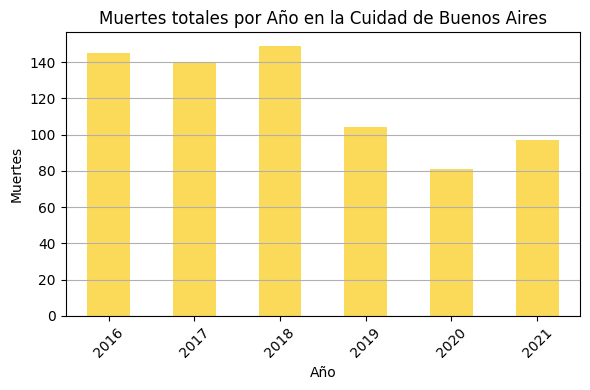

In [172]:
# Agrupamos los siniestros por anio, y sumamos la cantidad de victimas
muertes_por_anio = hechos_df.groupby(['anio'])['cant_victimas'].sum()
# Graficamos el total de muertes por año
plt.figure(figsize=(6, 4))
muertes_por_anio.plot(kind='bar', color= '#fcda59')
plt.title('Muertes totales por Año en la Cuidad de Buenos Aires')
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [173]:
# Paso 1: Filtramos por 2016 to 2019
data_2016_to_2019 = hechos_df[(hechos_df['anio'] >= 2016) & (hechos_df['anio'] <= 2019)]

# Paso 2: Calculamos el promedio del total de cant_victimas para  2016 to 2019
average_2016_to_2019 = data_2016_to_2019['cant_victimas'].sum()/4
print('el promedio para 2016 a 2019 de la cantidad de victimas por año fue:',average_2016_to_2019)

# Paso 3: Filtramos por 2020 y 2021 para calcular la tasa
data_2020 = hechos_df[(hechos_df['anio'] == 2020)]
data_2021 = hechos_df[(hechos_df['anio'] == 2021)]

# Paso 4: Calculamos el total de cant_victimas para  2020 y  2021
total_data_2020 = data_2020['cant_victimas'].sum()
total_data_2021 = data_2021['cant_victimas'].sum()

porcentage_2020 = round(((total_data_2020-average_2016_to_2019)/average_2016_to_2019)*100,2)
porcentage_2021 = round(((total_data_2021-average_2016_to_2019)/average_2016_to_2019)*100,2)

# Paso 5: Comparamos el promedio 2016-2019 contra el 2020 y 2021
print('la tasa de variación de la cantidad de muertes para el 2020, considerando el promedio 2016-2019, es de: ', porcentage_2020, '%')
print('la tasa de variación de la cantidad de muertes para el 2021, considerando el promedio 2016-2019, es de: ', porcentage_2021, '%')

el promedio para 2016 a 2019 de la cantidad de victimas por año fue: 134.5
la tasa de variación de la cantidad de muertes para el 2020, considerando el promedio 2016-2019, es de:  -39.78 %
la tasa de variación de la cantidad de muertes para el 2021, considerando el promedio 2016-2019, es de:  -27.88 %


La tendencia de la distribución de siniestros aparenta ir a la baja, siendo la comparativa promedio 2016-2019 versus 2020 y 2021, la caída en 2020 está afectada por el cierre de la pandemia covid-19, con lo cual la tasa real de caida en la cantidad de muertes sería mas asertiva considerar la del 2021, aunque esta también se vería afectada por la misma razón ya que no fue hasta finales del 2021 que realmente se puede considerar la actividad como normal.<br>

#### 3. Mes
Vemos la distribución de los siniestros por mes y por año para detectar patrones o ciclos<br>

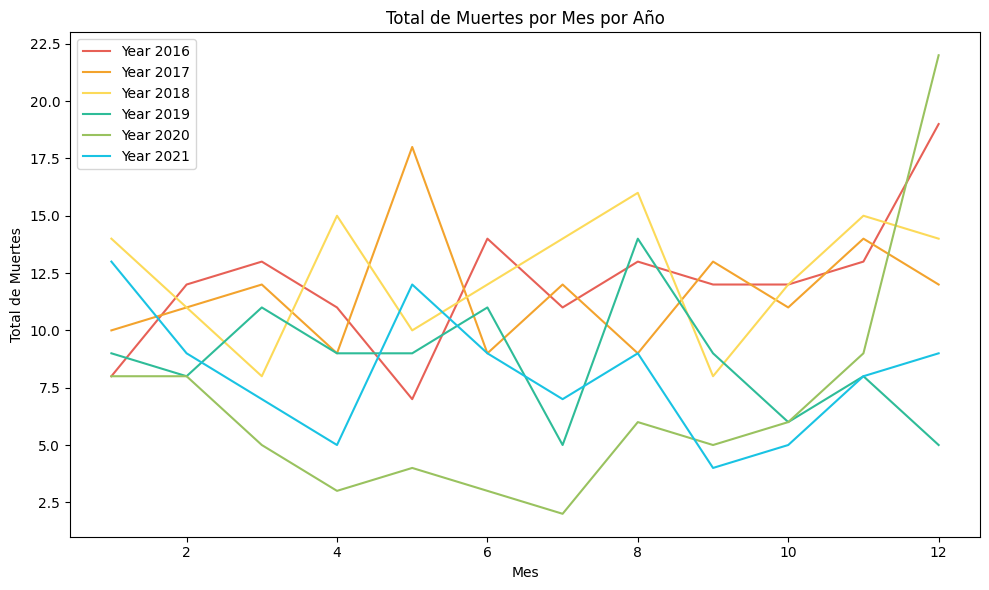

In [174]:
# Agrupamos los siniestros por anio y mes, y sumamos la cantidad de victimas
muertes_por_mes_anio = hechos_df.groupby(['anio','mes'])['cant_victimas'].sum()

# Desapilar el índice múltiple para separar años y meses
muertes_por_mes_anio_unstacked = muertes_por_mes_anio.unstack(level=0)

# Graficamos las lineas de evolucion por mes de cada anio y los superponemos
plt.figure(figsize=(10, 6))

for i, year in enumerate(muertes_por_mes_anio_unstacked.columns):
    muertes_por_mes_anio_unstacked[year].plot(
        kind='line', 
        color=ColoresBA_claros[i % len(ColoresBA_claros)],  # Cycle through colors from coloresBA
        label=f'Year {year}'
    )

plt.title('Total de Muertes por Mes por Año')
plt.xlabel('Mes')
plt.ylabel('Total de Muertes')
plt.legend()
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


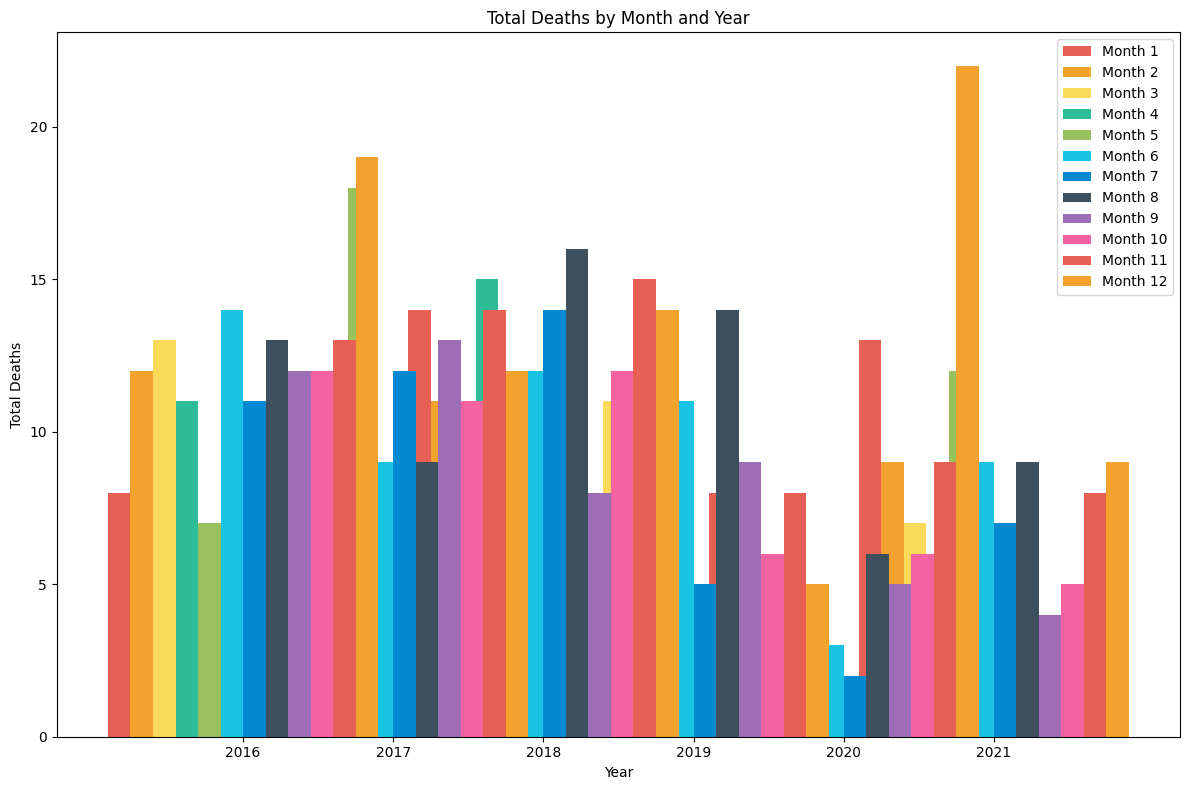

In [175]:
# Desapilar el índice múltiple para separar años y meses
muertes_por_mes_anio_unstacked = muertes_por_mes_anio.unstack(level=0)

# Graficamos un  bar chart agrupado por cada mes de cada año
plt.figure(figsize=(12, 8))

bar_width = 0.15  # Width of each bar

for i, month in enumerate(muertes_por_mes_anio_unstacked.index):
    # Calcular las posiciones x para las barras
    x_values = np.arange(len(muertes_por_mes_anio_unstacked.columns)) + (i * bar_width)
    
    # Graficamos
    plt.bar(
        x=x_values,
        height=muertes_por_mes_anio_unstacked.loc[month],
        width=bar_width,
        label=f'Month {month}',
        color=ColoresBA_claros[i % len(ColoresBA_claros)]  # Cycle through colors from coloresBA
    )

plt.title('Total Deaths by Month and Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.xticks(
    ticks=np.arange(len(muertes_por_mes_anio_unstacked.columns)) + (0.5 * bar_width * (len(muertes_por_mes_anio_unstacked.index) - 1)),
    labels=muertes_por_mes_anio_unstacked.columns
)
plt.legend()
plt.tight_layout()
plt.show()



Aunque ambos gráficos son confusos, y no permiten ver el detalle, sirven su propósito que es demostrar que no hay patrones o meses con mayor distribución, no sigue una estacionalidad ni una tendencia<br>

In [176]:
hechos_df.mes.describe()

count    695.000000
mean       6.686331
std        3.570133
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mes, dtype: float64

In [177]:
# Agrupar los incidentes por año y mes, y calcular la suma de víctimas
muertes_por_mes_anio = hechos_df.groupby(['anio', 'mes'])['cant_victimas'].sum()

# Restablecer el índice para convertir 'anio' y 'mes' en columnas regulares
muertes_por_mes_anio = muertes_por_mes_anio.reset_index()

# Agrupar por 'anio' y calcular la media, máximo y mínimo para cada año
summary_stats = muertes_por_mes_anio.groupby('anio')['cant_victimas'].agg(['mean', 'max', 'min'])

# Restablecer el índice para convertir 'anio' en una columna regular
summary_stats = summary_stats.reset_index()

# Round the mean, max, and min to 2 decimal places
summary_stats = summary_stats.round({'mean': 2, 'max': 2, 'min': 2})

# Convert the first row to integers
summary_stats.iloc[0] = summary_stats.iloc[0].astype(int)
summary_stats.T

,0,1,2,3,4,5
anio,2016.0,2017.00,2018.00,2019.00,2020.00,2021.00
mean,12.0,11.67,12.42,8.67,6.75,8.08
max,19.0,18.00,16.00,14.00,22.00,13.00
min,7.0,9.00,8.00,5.00,2.00,4.00


También podemos acompañar la visualización del gráfico de arriba, con las estadísticas para esta columna:
- El valor promedio de muertes por mes es de 3.5 muertes, el máximo 12 y el mínimo 1 muerte.
Pero para el **promedio por año por mes**:
- el **promedio de muertes por mes** *disminuye* consistentemente desde 2018 a 2021. de 12 muertes por mes a **menos de 9 muertes por mes**

#### 4. Dia
Vemos la distribución de los siniestros por dia y por año para detectar patrones o ciclos<br>
Buscamos encontrar patrones en la cantidad de accidentes a lo largo de la semana o del mes<br>

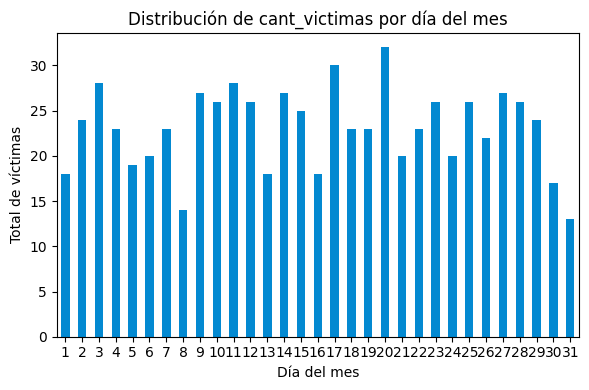

In [178]:
# Agrupar los incidentes por día del mes y sumar la cantidad de víctimas
muertes_por_dia_mes = hechos_df.groupby(['dia'])['cant_victimas'].sum()

# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
muertes_por_dia_mes.plot(kind='bar', color='#0389d1')
plt.title('Distribución de cant_victimas por día del mes')
plt.xlabel('Día del mes')
plt.ylabel('Total de víctimas')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

**Las conclusiones que se pueden definir de este gráfico son la variabilidad en el total de víctimas por día del mes y la ausencia de una tendencia clara o patrón específico**. Es decir, que no hay un día específico del mes que tenga consistentemente un número alto o bajo de víctimas, indicando una distribución bastante aleatoria.

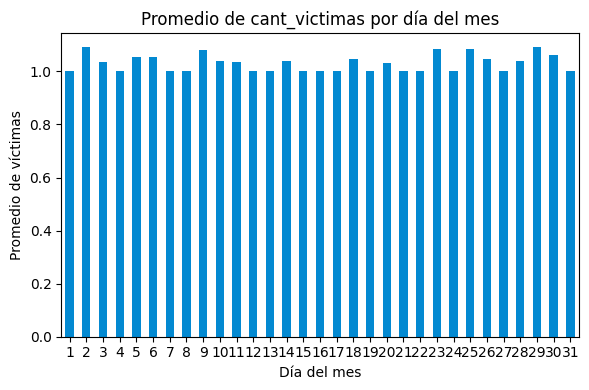

In [179]:
# Agrupar los incidentes por día del mes y calcular el promedio de la cantidad de víctimas
promedio_victimas_por_dia_mes = hechos_df.groupby(['dia'])['cant_victimas'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(6, 4))
promedio_victimas_por_dia_mes.plot(kind='bar', color='#0389d1')
plt.title('Promedio de cant_victimas por día del mes')
plt.xlabel('Día del mes')
plt.ylabel('Promedio de víctimas')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()


Buscamos encontrar patrones en la cantidad de accidentes a lo largo de la semana o del mes<br>

El día de la semana con menor cantidad de muertes por dia 96
El día de la semana con mayor cantidad de muertes por 107
La tasa es de 11.46


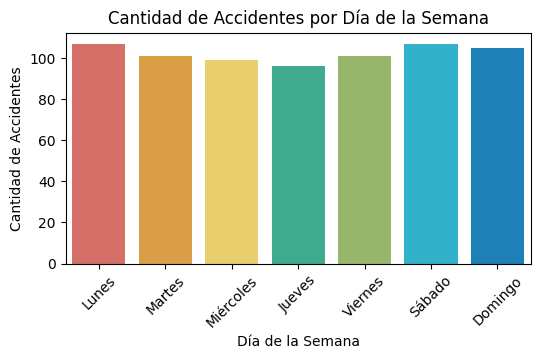

In [180]:
hechos_df['fecha'] = pd.to_datetime(hechos_df['fecha'])

# Extraemos día de la semana (0 = lunes, 6 = domingo)
hechos_df['Día semana'] = hechos_df['fecha'].dt.dayofweek
# Mapeamos el número del día de la semana a su nombre
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
hechos_df['Nombre día'] = hechos_df['Día semana'].map(lambda x: dias_semana[x])
# Contamos la cantidad de muertes por día de la semana
data = hechos_df.groupby('Nombre día').agg({'cant_victimas':'sum'}).reset_index()
    
# Graficamos
plt.figure(figsize=(6, 3))
ax = sns.barplot(x='Nombre día', y='cant_victimas', data=data, order=dias_semana, palette=ColoresBA_claros)

ax.set_title('Cantidad de Accidentes por Día de la Semana') ; ax.set_xlabel('Día de la Semana') ; ax.set_ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)

# Resumen de datos
print(f'El día de la semana con menor cantidad de muertes por dia {data.min()[1]}')
print(f'El día de la semana con mayor cantidad de muertes por {data.max()[1]}')
print(f'La tasa es de {round((data.max()[1] - data.min()[1]) / data.min()[1] * 100,2)}')

# Se muestra el gráfico
plt.show()

Teniendo en cuenta todos los registros, los accidentes tienden a ocurrir principalmente entre los días viernes y lunes, alcanzando su punto máximo los sábados y su mínimo los jueves.<br> Sin embargo, la diferencia entre la cantidad mínima y máxima registrada durante la semana es solo del 11.5%.<br>

### Indagamos mas en profundidad para definir si hay una mayor incidencia real de un aumento en la tasa de siniestros durante el finde semana, viernes a domingo, contra la tasa de muertes durante los dias de semana.
Para esto, calculamos para los dias de semana, el promedio de accidentes diario y para los dias viernes a domingo el promedio de accidentes diario. 
Y comparamos los mismos.

In [181]:
# Convertimos la columna fecha en datetime para poder utilizar las funciones de manipulación de fechas
hechos_df['fecha'] = pd.to_datetime(hechos_df['fecha'])

# Extraemos el dia de la semana (0 = Monday, 6 = Sunday)
hechos_df['day_of_week'] = hechos_df['fecha'].dt.dayofweek

# Definimos la función para categorizar los dias en weekday (lunes-jueves) or weekend (viernes-domingo)
def categorize_day(day):
    if day < 4:  # Lunes a Jueves
        return 'weekday'
    else:       # Viernes a Domingo
        return 'weekend'

# Applicamos la función para crear la columna 'day_category'
hechos_df['day_category'] = hechos_df['day_of_week'].apply(categorize_day)

# Calculamos el numero total de muertes en los dias de semana versus fines de semana 
total_weekday_accidents = hechos_df[hechos_df['day_category'] == 'weekday']['cant_victimas'].sum()
total_weekend_accidents = hechos_df[hechos_df['day_category'] == 'weekend']['cant_victimas'].sum()

# Contamos la cantidad de  weekdays y weekends
num_weekdays = len(hechos_df[hechos_df['day_category'] == 'weekday'])
num_weekends = len(hechos_df[hechos_df['day_category'] == 'weekend'])

# Calculamos el promedio de muertes en weekdays y en  weekends
average_total_weekday_accidents = total_weekday_accidents / num_weekdays
average_total_weekend_accidents = total_weekend_accidents / num_weekends

# Calculamos el porcentaje de muertes en weekdays y en weekends
total_accidents = hechos_df['cant_victimas'].sum()
percentage_weekday = round(((total_weekday_accidents / total_accidents) * 100),2)
percentage_weekend = round(((total_weekend_accidents / total_accidents) * 100),2)

print("El promedio total de muertes durante los dias de semana es:", round(average_total_weekday_accidents,2))
print("Porcentaje de muertes durante los dias de semana:", percentage_weekday, '%')
print("El promedio total de muertes durante los dias del fin de semana es:",round(average_total_weekend_accidents,2))
print("Porcentaje de muertes durante los dias del fin de semana:", percentage_weekend, '%')   


El promedio total de muertes durante los dias de semana es: 1.02
Porcentaje de muertes durante los dias de semana: 56.28 %
El promedio total de muertes durante los dias del fin de semana es: 1.05
Porcentaje de muertes durante los dias del fin de semana: 43.72 %


### Distribución de Muertes por día:
- Durante los días de semana, el promedio total de muertes es de 1.02.
- Durante los fines de semana, el promedio total de muertes es de 1.05.
- Esto sugiere que hay una ligera tendencia a un mayor número de muertes durante los fines de semana en comparación con los días laborables.
- Porcentaje de Muertes:
- El 56.28% de las muertes ocurren durante los días de semana.
- El 43.72% de las muertes ocurren durante los fines de semana.

**Aunque la diferencia no es significativa, muestra que los fines de semana tienen una proporción ligeramente menor de muertes en comparación con los días laborables.**

#### 5. Hora
Vamos a trabajar con la distribución de accidentes por hora para detectar si hay un pico de ocurrencia o picos de ocurrencia de accidentes, es decir si hay alguna hora a la que haya más cantidad de accidentes.

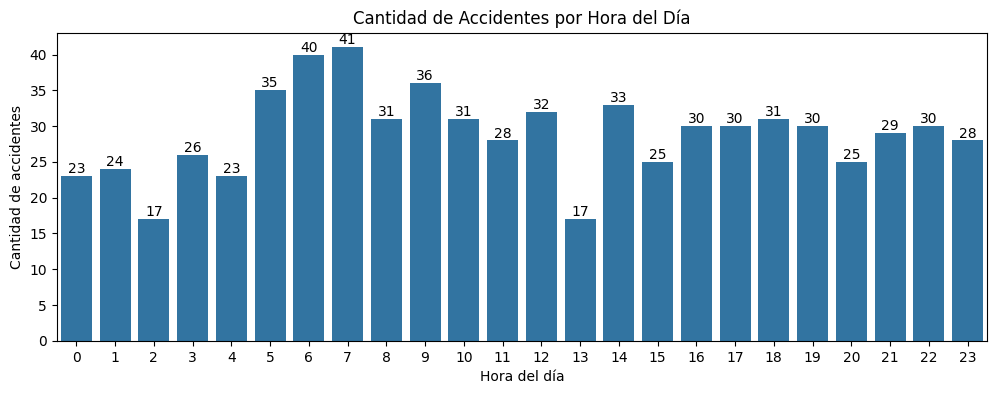

In [182]:
# Se cuenta la cantidad de accidentes por hora del día
data = hechos_df['hora_int'].value_counts().reset_index()
data.columns = ['Hora del día', 'Cantidad de accidentes']

# Se ordena los datos por hora del día
data = data.sort_values(by='Hora del día')

# Se crea el gráfico de barras
plt.figure(figsize=(12, 4))
ax = sns.barplot(x='Hora del día', y='Cantidad de accidentes', data=data)

ax.set_title('Cantidad de Accidentes por Hora del Día') ; ax.set_xlabel('Hora del día') ; ax.set_ylabel('Cantidad de accidentes')

# Se agrega las cantidades en las barras
for index, row in data.iterrows():
    ax.annotate(f'{row["Cantidad de accidentes"]}', (row["Hora del día"], row["Cantidad de accidentes"]), ha='center', va='bottom')

# Se muestra el gráfico
plt.show()


Analizando el gráfico, se observa que **la mayor cantidad de accidentes ocurre a las 6 de la mañana** con *41 incidentes registrados*.<br>
Hay un aumento significativo en los **accidentes desde la 1 de la mañana hasta alcanzar este pico a las 6 am**. Posteriormente, los números disminuyen pero se mantienen relativamente altos durante el resto del día.

- A las 8 y a las 9 de la mañana hay una disminución notable en los accidentes.<br>
- A partir de las 10 am hasta las 3 pm, los accidentes se mantienen constantes, oscilando entre los 31 y los 36 casos.<br>
- Hay una caída significativa a las 14 horas con solo 17 accidentes.<br>
- Desde las 15 horas en adelante, los números vuelven a ser constantes, manteniéndose alrededor de los 30 casos por hora. <br>

>En resumen, es crucial prestar atención adicional durante las primeras horas de la mañana cuando ocurren más accidentes. También es esencial mantenerse alerta durante todo el día ya que no hay una disminución significativa después del pico matutino.

#### 6. Alt y Cruce
Para esta columna la vamos a trabajar en conjunto con cruce, ya que lo importante será revisar si hay una ocurrencia mayor o incidencia a que los accidentes ocurran en la mitad de la calle o en la intersección de las calles.<br>
Para ello vamos a transformar estas columnas en una sola columna cruce, con un valor booleano: <br>
> True: Cuando el siniestro ocurre en la intersección de dos calles <br>
>False: Cuando el siniestro ocurre sobre la calle a una altura determinada que no es la intersección entre dos calles<br>

In [183]:
hechos_df['bool_cruce'] = hechos_df['cruce']

#### Son 696 registros y los vamos a convertir a:
1. cruce = True <== Cuando cruce != Nan
2. cruce = False <== Cuando cruce == Nan

In [184]:
hechos_df.loc[(hechos_df['cruce'] != 'Nan'), 'bool_cruce'] = True

In [185]:
hechos_df.loc[(hechos_df['cruce'] == 'Nan'), 'bool_cruce'] = False

In [186]:
hechos_df['bool_cruce'].value_counts()

bool_cruce
True     525
False    170
Name: count, dtype: int64

In [187]:
hechos_df.drop(['cruce','alt'],axis=1, inplace= True)

### Graficamos la cantidad de siniestros que ocurren en las intersección versus la cantidad de siniestros que ocurren en la calle.

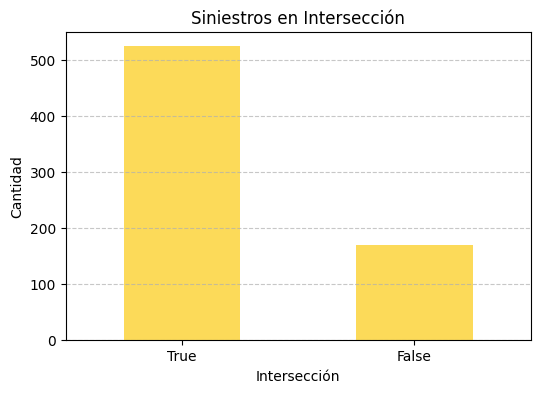

In [189]:
# Calculamos la distribución de siniestros según su ocurrencia en la intersección o no de dos calles
value_counts = hechos_df['bool_cruce'].value_counts()

# Graficamos esa distribución
plt.figure(figsize=(6, 4))
value_counts.plot(kind='bar', color='#fcda59')
plt.title('Siniestros en Intersección')
plt.xlabel('Intersección')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [190]:
# Calculamos el porcentaje de cada ocurrencia
total_records = len(hechos_df)
percentage = round(((value_counts / total_records) * 100),2)

# Creamos el DataFrame con la cantidad y porcentaje
data = {'count_occurrances': value_counts, 'percentage': percentage}
df_summary = pd.DataFrame(data)

# Creamos la tabla pivot
pivot_table = df_summary.pivot_table(index=['count_occurrances', 'percentage'])

pivot_table

,
count_occurrances,percentage
170,24.46
525,75.54


Se pueden ver que la mayor cantidad de muertes ocurren en la intersección de dos calles:
* El 75% de las muertes son en intersecciones
* El 25% ocurren sobre las calles y Avenidas o Autopistas sin cruces de calles.

#### 7. Tipo_Calle

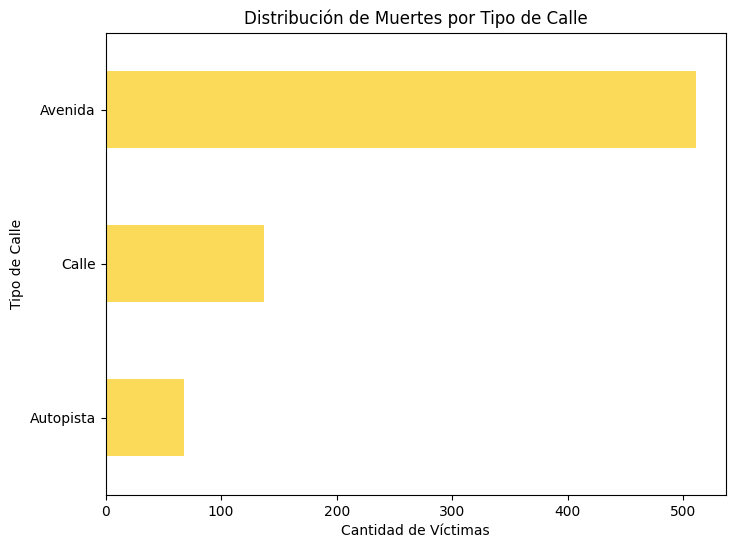

In [192]:
# Agrupamos por 'tipo_calle' y sumamos la 'cant_victimas'
muertes_agrupadas = hechos_df.groupby('tipo_calle')['cant_victimas'].sum()

# Ordenamos en orden descendente
muertes_agrupadas_sorted = muertes_agrupadas.sort_values(ascending=True)

# Creamos el gráfico de barras horizontal
plt.figure(figsize=(8, 6))
muertes_agrupadas_sorted.plot(kind='barh', color='#fcda59')
plt.title('Distribución de Muertes por Tipo de Calle')
plt.xlabel('Cantidad de Víctimas')
plt.ylabel('Tipo de Calle')
plt.show()


**Conclusiones**
El 70% de los accidentes ocurren en Avenidas, luego en calles 20% y por último en Autopistas<br>


#### 8. Victima

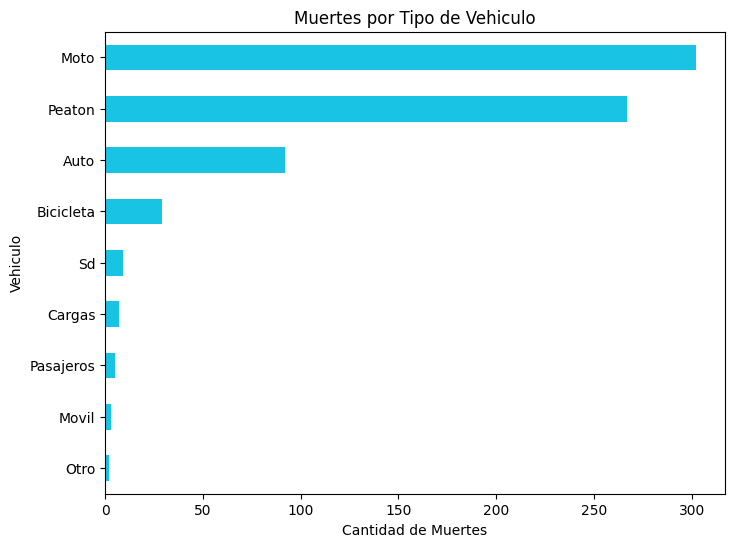

In [193]:
# Agrupamos por 'tipo_calle' y sumamos la 'cant_victimas'
muertes_agrupadas = hechos_df.groupby('victima')['cant_victimas'].sum()

# Ordenamos en orden descendente
muertes_agrupadas_sorted = muertes_agrupadas.sort_values(ascending=True)

# Creamos el gráfico de barras horizontal
plt.figure(figsize=(8, 6))
muertes_agrupadas_sorted.plot(kind='barh', color='#19c3e3')
plt.title('Muertes por Tipo de Vehiculo')
plt.xlabel('Cantidad de Muertes')
plt.ylabel('Vehiculo')
plt.show()

**Conclusiones**
La mayor cantidad de muertes involucran a los motociclistas y los peatones, seguidos por autos.

#### 9. Acusado

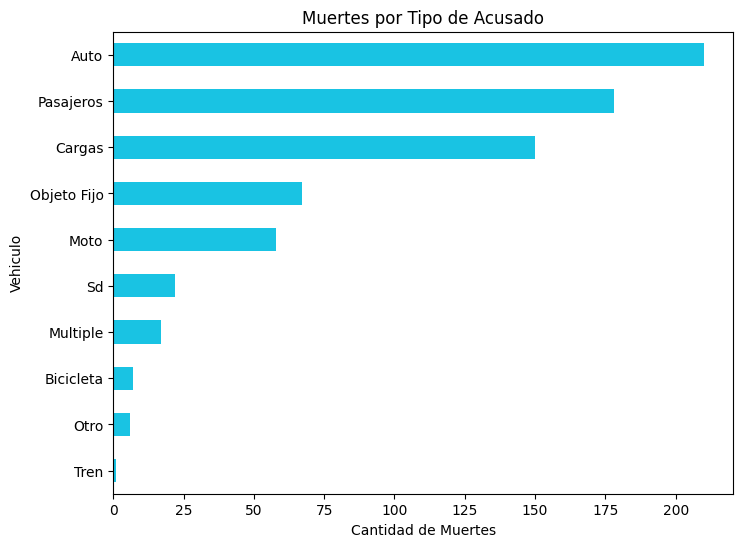

In [194]:
# Agrupamos por 'tipo_calle' y sumamos la 'cant_victimas'
muertes_agrupadas = hechos_df.groupby('acusado')['cant_victimas'].sum()

# Ordenamos en orden descendente
muertes_agrupadas_sorted = muertes_agrupadas.sort_values(ascending=True)

# Creamos el gráfico de barras horizontal
plt.figure(figsize=(8, 6))
muertes_agrupadas_sorted.plot(kind='barh', color='#19c3e3')
plt.title('Muertes por Tipo de Acusado')
plt.xlabel('Cantidad de Muertes')
plt.ylabel('Vehiculo')
plt.show()

**Conclusiones**
La mayor cantidad de muertes son provocadas por conductores de autos, siendo los de mayor tasa de mortalidad.

### 2.3 Guardamos las modificaciones hechos_df 

In [195]:
# Ruta donde guardamos el file y el name_file
hechos = 'data\\hechos_etl.csv'
# Guardamos el dataframe en un archivo .csv
hechos_df.to_csv(hechos, index=False)
# Mensaje de confirmación de escritura
print(f'El hechos_df fue guardado en {hechos}')

El hechos_df fue guardado en data\hechos_etl.csv


#### Ya habiendo explorado el dataset y cada una de sus variables, ganamos conocimiento en profundidad de las relaciones entre variables y del potencial de información que se presenta en el mismo. Ahora continuaremos con un **analisis multivariable**, agruparemos y mostraremos la variables e información para su mejor visualización y entendimiento. 
Comenzaremos con la transformación de la data en información y conclusiones. 

# 1.3.2 Cantidad de siniestros
Comenzamos por la evolución de los siniestros, esto es por año:
#### A. Evolución de la cantidad de siniestros por año.<br>

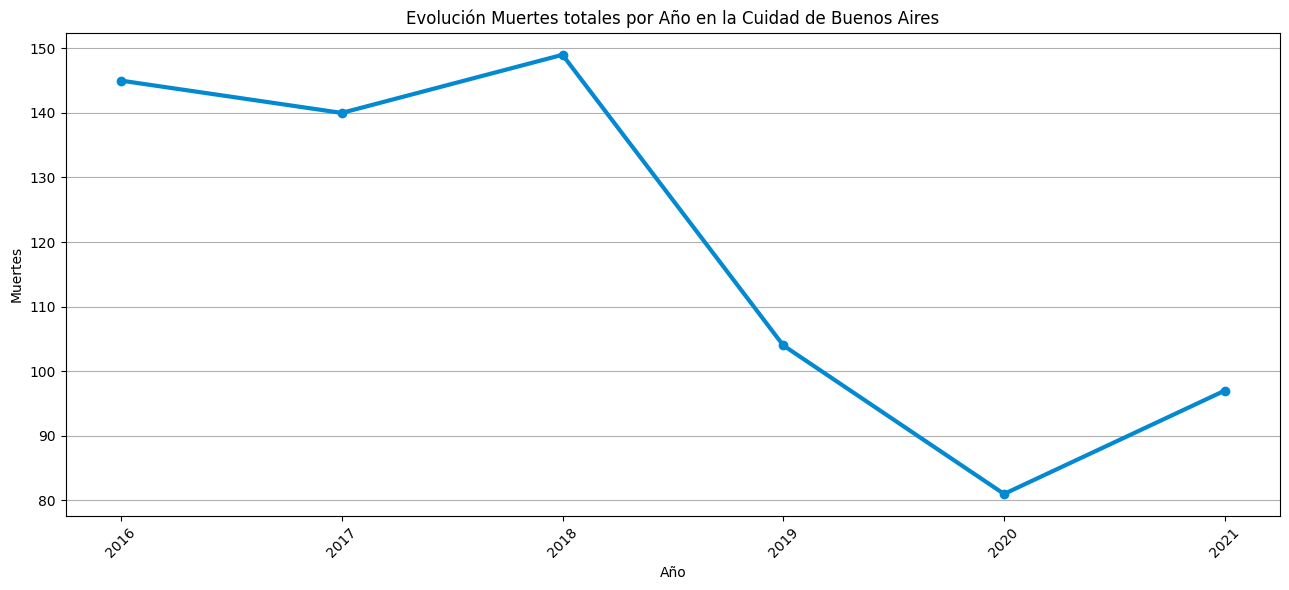

In [197]:
# Calculamos las muertes por año según la cantidad de victimas
muertes_por_anio = hechos_df.groupby('anio')['cant_victimas'].sum()
# Graficamos la evolución en la cantidad de victimas
plt.figure(figsize=(13, 6))
muertes_por_anio.plot(kind='line', color='#0389d1', marker='o', linestyle='-',linewidth=3)
plt.title('Evolución Muertes totales por Año en la Cuidad de Buenos Aires')
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Conclusiones Evolución de muertes por año en siniestros en la Ciudad de Buenos Aires
___________________________________________________________________________________________________
Podemos observar la evolución en la cantidad de muertes por año a partir del 2016, se evidencia un descenso en la cantidad de muertes, igualmente esta cantidad se ve afectada por la pandemia del covid-19 donde en Argentina se declaró un cierre total y casi completo de actividades que influyó de manera directa e importante en los valores del 2020 y 2021, como se puede ver, al realizarse la apertura parcial en 2021 se fue incrementando. Pero ambos años se ven claramente afectados. No se los puede considerar un descenso real en la cantidad, deberíamos poder contar con esta data para el 2023 para poder concluir si se trata efectivamente de una tendencia real.

#### B. Evolución de muertes por año en siniestros en la Ciudad de Buenos Aires por tipo_calle
Ahora conjugamos la cantidad de muertes agregando a lo anterior la variable por tipo de calle (Avenida, Autopista o calle)

<Figure size 1400x800 with 0 Axes>

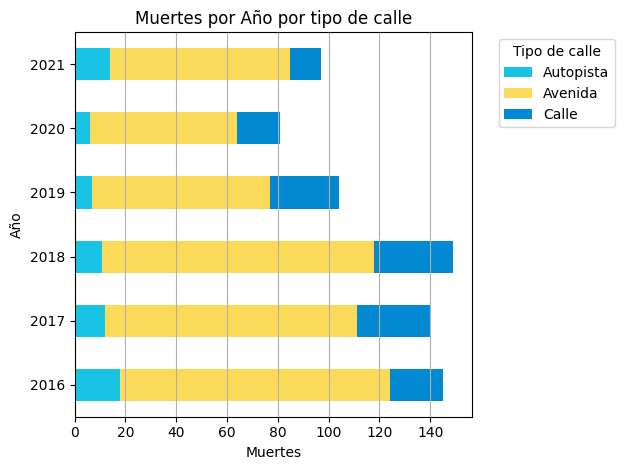

In [200]:
# Agrupamos por 'anio' y luego por 'tipo_calle' y sumamos la 'cant_victimas'
muertes_agrupadas = hechos_df.groupby(['anio', 'tipo_calle'])['cant_victimas'].sum().unstack()
ColoresBA_celestes = ['#19c3e3', '#fcda59', '#0389d1', '#3e4f5e']
# Definimos la paleta de colores que representa a los colores de la Cuidad de Buenos Aires
sns.set_palette(ColoresBA_celestes)

# Graficamos un grafico de barras apiladas 
plt.figure(figsize=(14, 8))
muertes_agrupadas.plot(kind='barh', stacked=True)
plt.title('Muertes por Año por tipo de calle')
plt.xlabel('Muertes')
plt.ylabel('Año')
plt.legend(title='Tipo de calle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#### Evolución de muertes por año en siniestros en la Ciudad de Buenos Aires por tipo_calle
#### Visualizamos los datos en una tabla con sus porcentajes, tasa de cambio de año a año

In [202]:
# Calculamos el porcentaje de cambio frente al anio anterior para cada 'tipo_calle'
percentage_change = round((muertes_agrupadas.pct_change() * 100),2)

# Combinamos todo en un tabla pivot con el total de muertes y su porcentaje 
pivot_table = pd.concat([muertes_agrupadas, percentage_change], axis=1, keys=['Total', 'Percentage Change'])

# Reemplazamos los valores NaN en el porcentaje con ceros
pivot_table.fillna(0, inplace=True)
pivot_table.T

anio                           2016   2017    2018   2019   2020    2021
                  tipo_calle                                            
Total             Autopista    18.0  12.00   11.00   7.00   6.00   14.00
                  Avenida     106.0  99.00  107.00  70.00  58.00   71.00
                  Calle        21.0  29.00   31.00  27.00  17.00   12.00
Percentage Change Autopista     0.0 -33.33   -8.33 -36.36 -14.29  133.33
                  Avenida       0.0  -6.60    8.08 -34.58 -17.14   22.41
                  Calle         0.0  38.10    6.90 -12.90 -37.04  -29.41

#### Visualizamos las muertes y que porcentaje representa cada tipo_calle  por año 

In [203]:
# Agrupamos por 'anio' y luego por 'tipo_calle' y sumamos la 'cant_victimas'
muertes_agrupadas = hechos_df.groupby(['anio', 'tipo_calle'])['cant_victimas'].sum().unstack()

# Calculamos el porcentaje de muertes para cada tipo_calle en relación con el total de muertes por año
percentage_deaths = round((muertes_agrupadas.div(muertes_agrupadas.sum(axis=1), axis=0) * 100),2)

# Combinamos el total de muertes y los porcentajes en una tabla pivot
pivot_table = pd.concat([muertes_agrupadas, percentage_deaths], axis=1, keys=['Total', 'Percentage'])
pivot_table

Total               Percentage               
tipo_calle Autopista Avenida Calle  Autopista Avenida  Calle
anio                                                        
2016              18     106    21      12.41   73.10  14.48
2017              12      99    29       8.57   70.71  20.71
2018              11     107    31       7.38   71.81  20.81
2019               7      70    27       6.73   67.31  25.96
2020               6      58    17       7.41   71.60  20.99
2021              14      71    12      14.43   73.20  12.37

##### Las tasas de muertes por tipo_calle

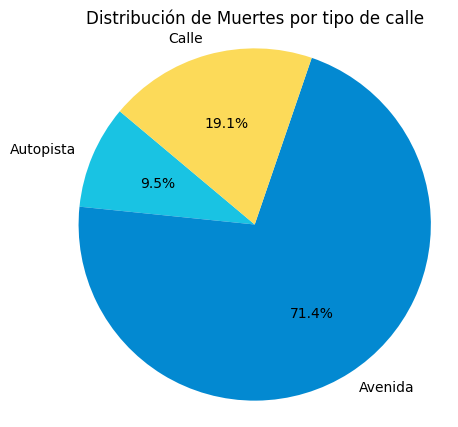

In [207]:
# Agrupamos por 'tipo_calle' y sumamos la 'cant_victimas'
muertes_agrupadas = hechos_df.groupby('tipo_calle')['cant_victimas'].sum()
plt.figure(figsize=(5, 5))
plt.pie(muertes_agrupadas, labels=muertes_agrupadas.index, autopct='%1.1f%%', startangle=140, colors=['#19c3e3','#0389d1', '#fcda59'])
plt.title('Distribución de Muertes por tipo de calle')
plt.axis('equal')  # para que el grafico quede como un circulo
plt.show()

##### Las tasas de muertes por tipo_calle permanecen constantes a lo largo de los años, con una distribución similar:
- 13% de las muertes ocurren en la Autopista.<br>
- 70% de las muertes ocurren en Avenidas.<br>
- y el restante 17% en calles.<br>

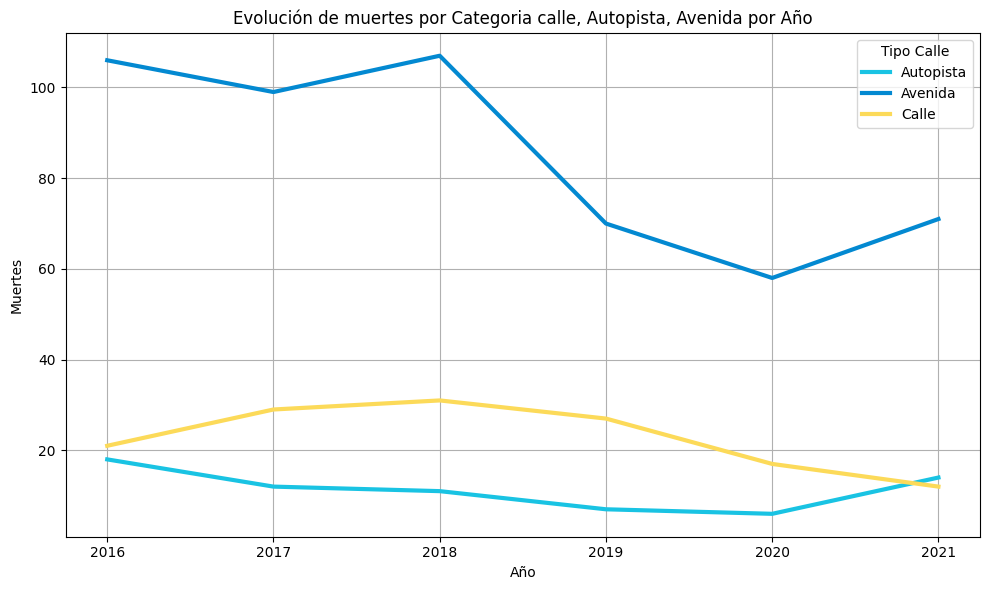

In [214]:
# Agrupamos por 'anio' y luego por 'tipo_calle' y sumamos la 'cant_victimas'
muertes_agrupadas = hechos_df.groupby(['anio', 'tipo_calle'])['cant_victimas'].sum().unstack()

ColoresBA_celestes = ['#19c3e3','#0389d1', '#fcda59', '#3e4f5e', '#f562a2' ]
# Graficamos la Evolución de muertes por 'tipo_calle' separadas una en cada línea
plt.figure(figsize=(10, 6))

for i, tipo_calle in enumerate(muertes_agrupadas.columns):
    plt.plot(muertes_agrupadas.index, muertes_agrupadas[tipo_calle], label=tipo_calle, linewidth=3, color=ColoresBA_celestes[i])

plt.title('Evolución de muertes por Categoria calle, Autopista, Avenida por Año')
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.legend(title='Tipo Calle')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusiones Evolución de muertes por año en siniestros en la Ciudad de Buenos Aires por tipo_calle
___
Conclusiones: De observar la tabla y gráficos presentados podemos decir:
- **Avenida** la mayor cantidad de muertes ocurren en Avenidas, el **70% de las muertes** y que la cantidad de muertes cae a partir de 2020 a causa de las restricciones de la pandemia.  Pero igualmente, se puede decir que se registra una tendencia a la baja, aunque la proporción se mantiene constante<br>
- **Calle** Le siguen en magnitud, las muertes en la calle, **17% de las muertes**, cercanas a la cantidad de muertes en Autopista. **Las muertes en la calle se mantienen constantes** en proporción y magnitud<br>
- **Autopista** Las muertes en **Autopista** son las de *menor ocurrencia* pero la tendencia también es **constante**. Con un **13% del total, no se registra una tendencia a la baja**<br>

**Volvemos a ver las cantidades distorsionadas por la pandemia covid-19 y el aislamiento que hizo disminuir al mínimo la circulación y por ende los siniestros**<br>    

#### C. Muertes por año en siniestros en la Ciudad de Buenos Aires por tipo de vehiculo

Ahora conjugamos la cantidad de muertes agregando a lo anterior la variable por victima, que representa una clasificación agregada del tipo de vehículos.
Categorias para tipo de Vehiculo (victima) =  ['peaton', 'moto', 'auto', 'cargas', 'bicicleta', 'pasajeros', 'movil', 'otro', 'sd']

In [215]:
# Creamos un dataframe donde agrupamos por 'anio' y 'victima'
muertes_agrupadas_victimas = hechos_df.groupby(['anio','victima'])['cant_victimas'].sum()
# Create a pivot table with columns representing victim categories and rows representing years
muertes_agrupadas_victimas = muertes_agrupadas_victimas.reset_index().pivot_table(index='anio', columns='victima', values='cant_victimas', fill_value=0)
muertes_agrupadas_victimas


victima,Auto,Bicicleta,Cargas,Moto,Movil,Otro,Pasajeros,Peaton,Sd
anio,,,,,,,,,
2016,18.0,4.0,3.0,65.0,1.0,0.0,1.0,48.0,5.0
2017,23.0,4.0,2.0,56.0,0.0,2.0,0.0,49.0,4.0
2018,17.0,3.0,2.0,57.0,2.0,0.0,2.0,66.0,0.0
2019,11.0,7.0,0.0,50.0,0.0,0.0,1.0,35.0,0.0
2020,12.0,5.0,0.0,28.0,0.0,0.0,0.0,36.0,0.0
2021,11.0,6.0,0.0,46.0,0.0,0.0,1.0,33.0,0.0


In [216]:
# Calculamos el total de muertes por vehiculo (victima)
muertes_por_vehiculo = hechos_df.groupby('victima')['cant_victimas'].sum()

# Calculamos el porcentage por cada vehiculo (victima) relativo al total general de 717 muertes
percentage_per_type = round((muertes_por_vehiculo / muertes_por_vehiculo.sum() * 100),2)

# Creamos el DataFrame con filas totales y porcentaje
summary_df = pd.DataFrame({'Total Deaths': muertes_por_vehiculo, 'Percentage': percentage_per_type})

# Agregmos una fila para el total  totales y porcentaje para cada tipo de vehiculo (victima) 
total_muertes = muertes_por_vehiculo.sum()
percentage_all = 100
summary_df.loc['Total'] = [total_muertes, percentage_all]
summary_df.T


victima,Auto,Bicicleta,Cargas,Moto,Movil,Otro,Pasajeros,Peaton,Sd,Total
Total Deaths,92.00,29.00,7.00,302.00,3.00,2.00,5.0,267.00,9.00,716.0
Percentage,12.85,4.05,0.98,42.18,0.42,0.28,0.7,37.29,1.26,100.0


#### Muertes por tipo de Vehiculo

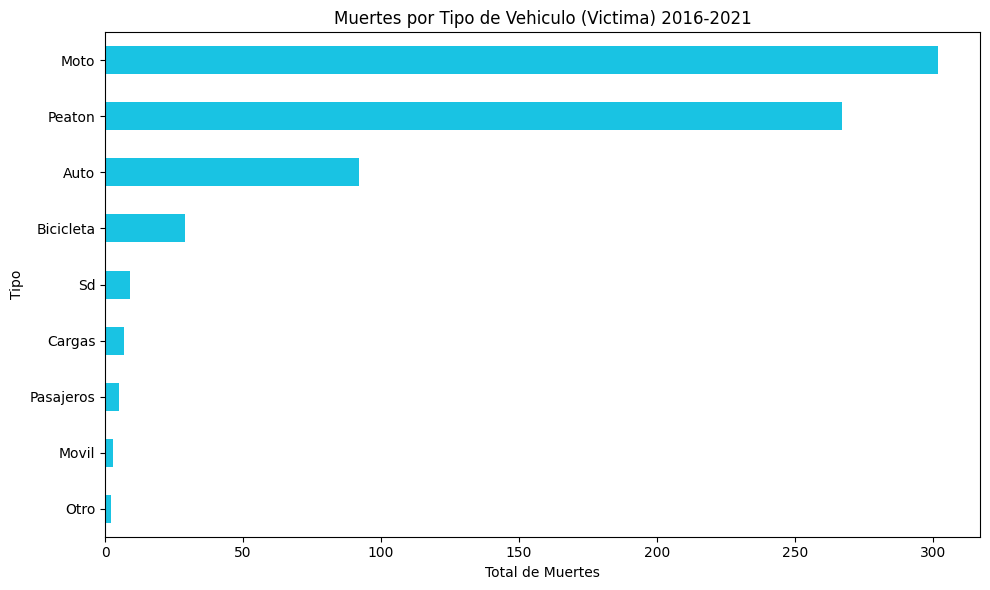

In [217]:
# Sort total deaths in descending order
muertes_por_vehiculo_sorted = muertes_por_vehiculo.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
muertes_por_vehiculo_sorted.plot(kind='barh', color='#19c3e3')

# Set chart title and labels
plt.title('Muertes por Tipo de Vehiculo (Victima) 2016-2021')
plt.xlabel('Total de Muertes')
plt.ylabel('Tipo')

# Show plot
plt.tight_layout()
plt.show()

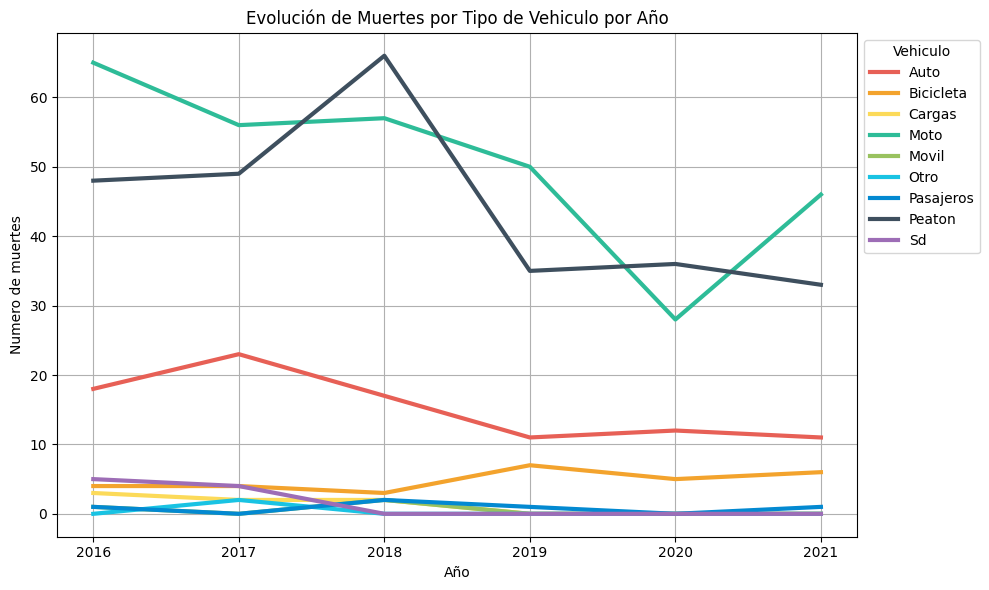

In [219]:
# Valores de victima
victima_types = ['peaton', 'moto', 'auto', 'cargas', 'bicicleta', 'pasajeros', 'movil', 'otro', 'sd']

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each column in the DataFrame
for i, victim_type in enumerate(muertes_agrupadas_victimas.columns):
    # Plot the evolution of the current victim type over the years
    plt.plot(muertes_agrupadas_victimas.index, muertes_agrupadas_victimas[victim_type], label=victim_type, linewidth=3, color=ColoresBA_claros[i])

# Set plot title and labels
plt.title('Evolución de Muertes por Tipo de Vehiculo por Año')
plt.xlabel('Año')
plt.ylabel('Numero de muertes')
plt.legend(title='Vehiculo', bbox_to_anchor=(1, 1))
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

#### Conclusiones Muertes por año en siniestros en la Ciudad de Buenos Aires por tipo de vehículo
---
- **Moto**: Podemos observar que es el tipo predominante de muerte por vehiculo (victima). Si lo conjugamos con la información de la tabla anterior, vemos que las muertes de motociclistas **representan el 42% del total de las muertes**. Y si tomamos su evolución, van con una **marcada tendencia a la baja**.
- **Peatones** le siguen en orden de magnitud, con el **37% de las muertes**. Desde el *2016 vienen descendiendo la cantidad de muertes de peatones*, con una **reducción del 50%** si comparamos el 2018 contra 2021.
- **Auto**: es el tercer tipo de vehiculo, con un **13% del total** de las muertes, unas **92 muertes desde el 2016 al 2021**. también se observa que la tendencia es muy leve, pero a la baja. 

## Para completar nuestro análisis de la evolución de muertes por categoria nos restarian dos categorias muy importantes a considerar:
- Rango de edades<br>
- Sexo<br>
* Rango de Edades y Sexo<br>
Para poder realizar el mismo procederemos a combinar ambas tablas: <br>
- homicidios (informacion general sobre los siniestros)<br>
- victimas (información particular sobre cada una de las 717 muertes, sexo y edades, categorias de victimas)<br>
Vamos a crear un Dataframe combinando ambos, victimas con homicidios,  para obtener un dataframe combinando todos los campos e información necesaria para nuestro análisis<br>

In [220]:
# Cargamos victimas_df:
victimas_df = pd.read_csv('data//victimas_etl.csv')

In [221]:
victimas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       717 non-null    object
 1   fecha    717 non-null    object
 2   anio     717 non-null    int64 
 3   mes      717 non-null    int64 
 4   dia      717 non-null    int64 
 5   rol      717 non-null    object
 6   victima  717 non-null    object
 7   sexo     717 non-null    object
 8   edad     717 non-null    object
dtypes: int64(3), object(6)
memory usage: 50.5+ KB


In [222]:
# Renombramos las columnas victima y acusado de hechos para distinguirlas de las mismas columnas de victimas_df
hechos_df.rename(columns={'victima': 'hecho_victima', 'acusado': 'hecho_acusado'}, inplace=True)

# Elegimos de hechos_df cuales columnas queremos migrar o unir a victimas_df
hechos_cols = ['id', 'hora','hora_int' ,'tipo_calle', 'bool_cruce', 'comuna', 'hecho_victima', 'hecho_acusado']
hechos_editado = hechos_df[hechos_cols]

# Hacemos el merge de  victimas_df con  hechos_editado atraves de la columna 'id'
victimas_completo_df = victimas_df.merge(hechos_editado, on='id', how='left')
victimas_completo_df

,id,fecha,anio,mes,dia,rol,victima,sexo,edad,hora,hora_int,tipo_calle,bool_cruce,comuna,hecho_victima,hecho_acusado
0,2016-0001,2016-01-01,2016,1,1,Conductor,Moto,Masculino,19,04:00:00,4.0,Avenida,True,8,Moto,Auto
1,2016-0002,2016-01-02,2016,1,2,Conductor,Auto,Masculino,70,01:15:00,1.0,Avenida,True,9,Auto,Pasajeros
2,2016-0003,2016-01-03,2016,1,3,Conductor,Moto,Masculino,30,07:00:00,7.0,Avenida,False,1,Moto,Auto
3,2016-0004,2016-01-10,2016,1,10,Conductor,Moto,Masculino,18,00:00:00,0.0,Avenida,True,8,Moto,Sd
4,2016-0005,2016-01-21,2016,1,21,Conductor,Moto,Masculino,29,05:20:00,5.0,Avenida,True,1,Moto,Pasajeros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,Peaton,Peaton,Femenino,50,06:20:00,6.0,Avenida,True,3,Peaton,Auto
713,2021-0093,2021-12-13,2021,12,13,Pasajero_Acompañante,Moto,Femenino,18,17:10:00,17.0,Avenida,True,7,Moto,Auto
714,2021-0094,2021-12-20,2021,12,20,Pasajero_Acompañante,Moto,Femenino,43,01:10:00,1.0,Autopista,True,9,Moto,Auto
715,2021-0095,2021-12-30,2021,12,30,Conductor,Moto,Masculino,27,00:43:00,0.0,Avenida,True,11,Moto,Cargas


In [223]:
%run -i funciones.py
calculate_column_stats(victimas_completo_df)

,Unique_Values,Missing_Values,Missing_Percentage,Min,Max,Most_Common,Has_Duplicates,Duplicate_Percentage,Data_Type
id,696,0,0.0,None,None,None,True,2.93,object
fecha,598,0,0.0,None,None,None,True,16.6,object
anio,6,0,0.0,2016,2021,2018,True,99.16,int64
mes,12,0,0.0,1,12,12,True,98.33,int64
dia,31,0,0.0,1,31,20,True,95.68,int64
rol,5,0,0.0,None,None,None,True,99.3,object
victima,8,0,0.0,None,None,None,True,98.88,object
sexo,3,0,0.0,None,None,None,True,99.58,object
edad,86,0,0.0,None,None,None,True,88.01,object
hora,324,1,0.14,None,None,None,True,54.67,object


### D. Evolución de la cantidad de muertes por Sexo

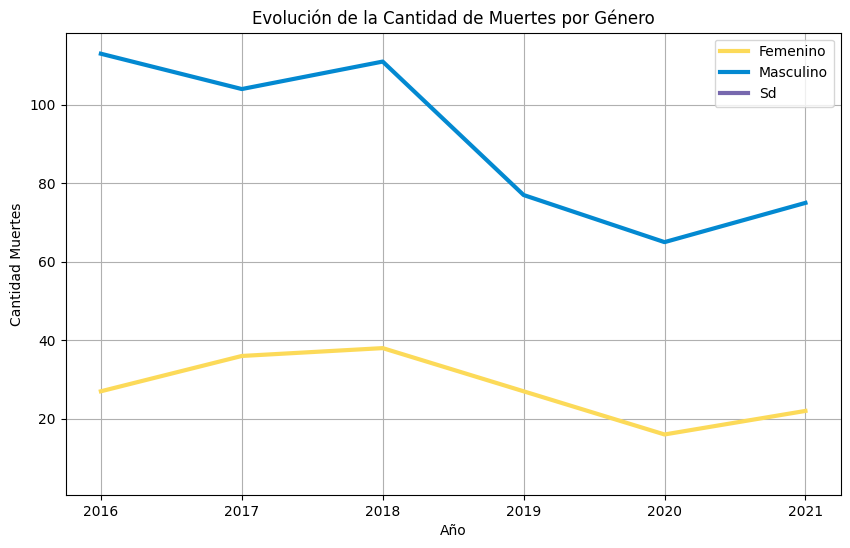

In [225]:
otros_BA = ['#fcda59','#0389d1','#7768AE'] 

# Group by 'anio' and 'sexo' and calculate the sum of 'cant_victimas'
muertes_por_anio_sexo = victimas_completo_df.groupby(['anio', 'sexo'])['id'].count().unstack()

# Plot the line plot
plt.figure(figsize=(10, 6))

# Plot each sex separately
for i, sex in enumerate(muertes_por_anio_sexo.columns):
    plt.plot(muertes_por_anio_sexo.index, muertes_por_anio_sexo[sex], label=sex,  color=otros_BA[i], linewidth=3)

# Add labels and title
plt.title('Evolución de la Cantidad de Muertes por Género')
plt.xlabel('Año')
plt.ylabel('Cantidad Muertes')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Del gráfico, observamos que el número de muertes masculinas fue significativamente mayor que las femeninas durante todos los años representados. <br>
- **En 2020**, hubo una **disminución drástica en el número de muertes registradas** para ambos géneros, lo cual es coherente con la restricción de circulación debido a la *pandemia de COVID-19* en Argentina.<br>
- **A partir de 2021**, se observa un aumento en las muertes, pero aún no ha alcanzado los niveles anteriores a la pandemia.<br>

1. **Número de Muertes por Género a lo Largo de los Años**:
- El gráfico muestra el número de muertes por género desde 2016 hasta 2021.<br>
- La línea amarilla representa las muertes masculinas, y la línea azul representa las muertes femeninas.<br>
- A partir de 2021, se observa un aumento en las muertes, aunque aún no han alcanzado los niveles previos a la pandemia.<br>
<br>

2. **Comparación de Géneros**:<br>
- Las muertes masculinas superan consistentemente a las femeninas en todos los años.<br>
- La disminución en 2020 se explica por las restricciones de circulación y el impacto de la pandemia.<br>

### E. Evolución de la cantidad de muertes por Edad
Para poder utilzar esta columna vamos a crear una columna de rango_etario

In [226]:
# Convertimos 'edad' en un valor numerico modificando su datatype
victimas_completo_df['edad'] = pd.to_numeric(victimas_completo_df['edad'], errors='coerce')

# Definimos los rangos etarios
bins = [0, 18, 30, 50, 66, float('inf')]
labels = ['0-17', '18-29', '30-49', '50-65', '66+']

# agregamos una columna 'rango_edad' basada en la columna edades convertida en rangos
victimas_completo_df['rango_edad'] = pd.cut(victimas_completo_df['edad'], bins=bins, labels=labels, right=False)
victimas_completo_df.rango_edad.value_counts()

rango_edad
30-49    269
18-29    198
50-65    111
66+      110
0-17      23
Name: count, dtype: int64

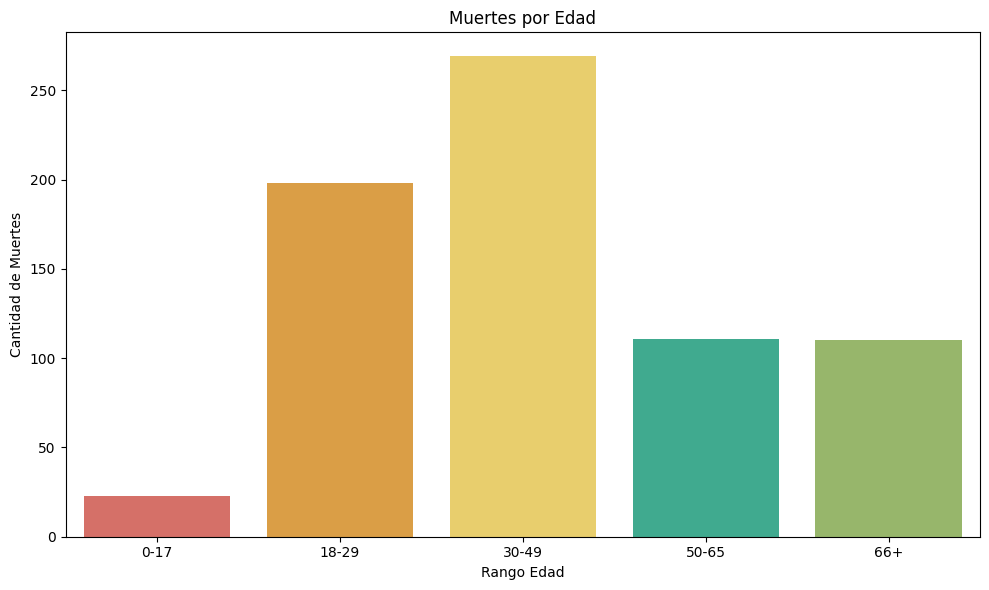

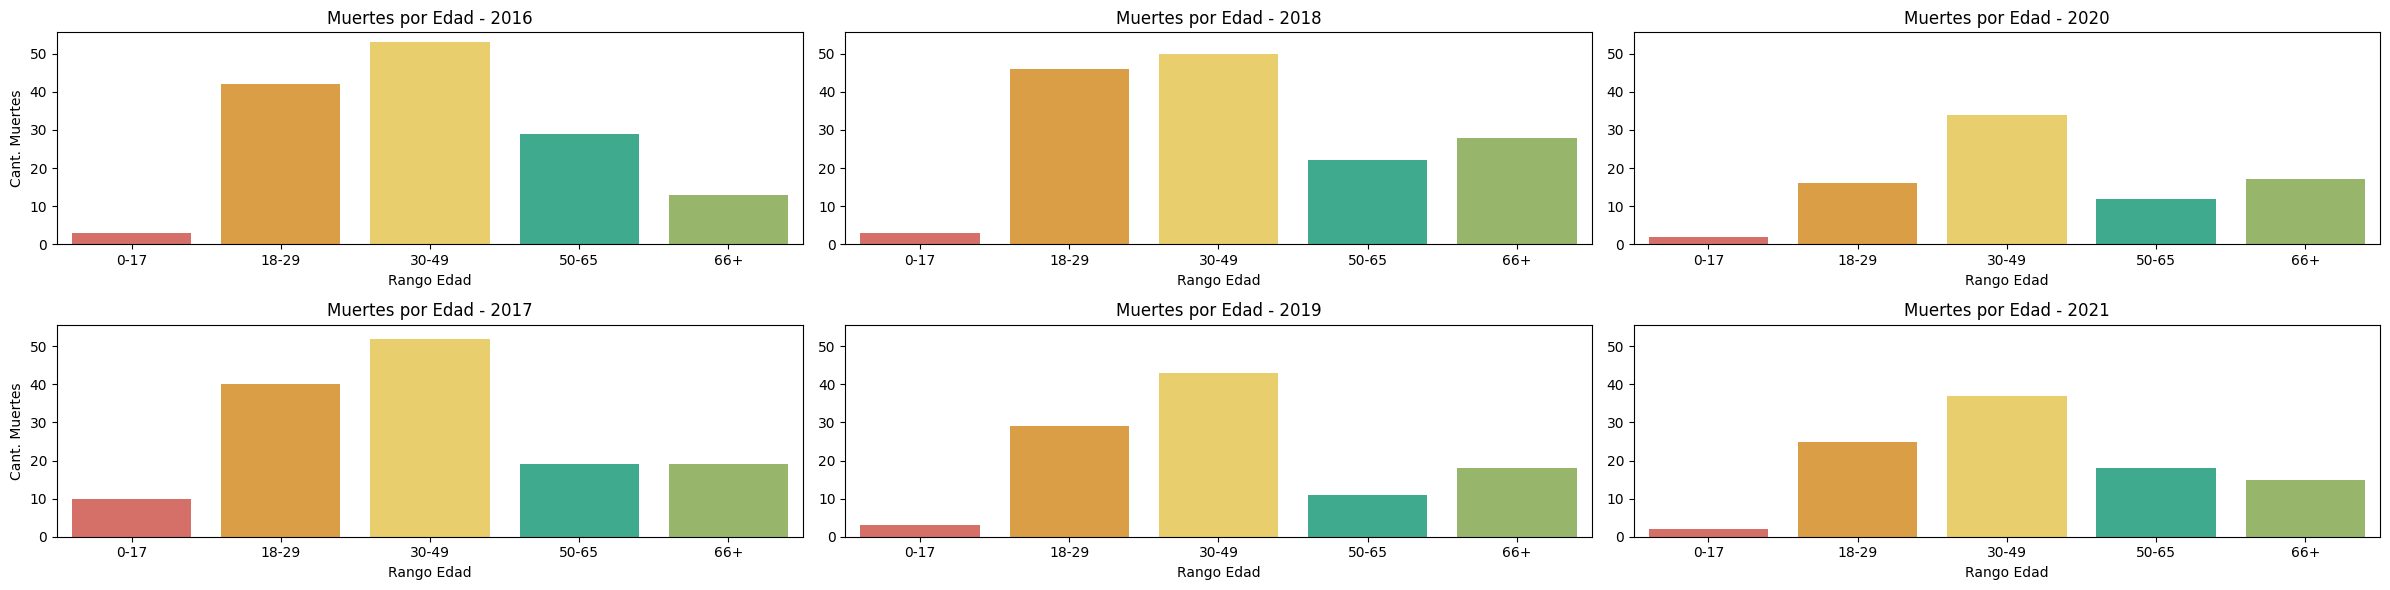

In [227]:
# Distribution of deaths by age range in general
plt.figure(figsize=(10, 6))
sns.countplot(x='rango_edad', data=victimas_completo_df, palette=ColoresBA_claros)
plt.title('Muertes por Edad')
plt.xlabel('Rango Edad')
plt.ylabel('Cantidad de Muertes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Separate plots for each year in a mosaic style
years = sorted(victimas_completo_df['anio'].unique())
num_plots = len(years)
num_cols = int(np.ceil(num_plots / 2))

fig, axes = plt.subplots(2, num_cols, figsize=(8 * num_cols, 6), sharey=True)

for i, year in enumerate(years):
    ax = axes[i % 2, i // 2]
    sns.countplot(x='rango_edad', data=victimas_completo_df[victimas_completo_df['anio'] == year], ax=ax, palette=ColoresBA_claros)
    ax.set_title(f'Muertes por Edad - {year}')
    ax.set_xlabel('Rango Edad')
    ax.set_ylabel('Cant. Muertes')
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', labelleft=True)
    ax.set_xticklabels(labels=labels, rotation=0)
    ax.set_xlabel('Rango Edad')
    ax.set_ylabel('Cant. Muertes')

# Adjust layout
plt.tight_layout()
plt.show()


**Distribución de Muertes por Edad:**
El gráfico representa la cantidad de muertes por rango etario.
- Los grupos de edad se dividen en cinco categorías: 0-17, 18-29, 30-49, 50-65 y 66+.
- Observamos que las personas entre 30-49 años presentan la  mayor cantidad de muertes, seguido por el grupo 18-29.
-  Los grupos 0-17 y 66+ tienen las cantidades más bajas de muertes.
**Conclusión**:
- Las personas en sus años intermedios (30-49) parecen estar en mayor riesgo según este gráfico.
- La disminución en 2020 se explica por las restricciones de circulación debido a la pandemia de COVID-19.
- **Podemos ver que esta distribución de cantidad de muertes por rango etario se mantiene estable, las tasas por rango, a lo largo del tiempo**. 

### Podemos combinar ambos análisis para visualizar las muertes por rango etario y por género

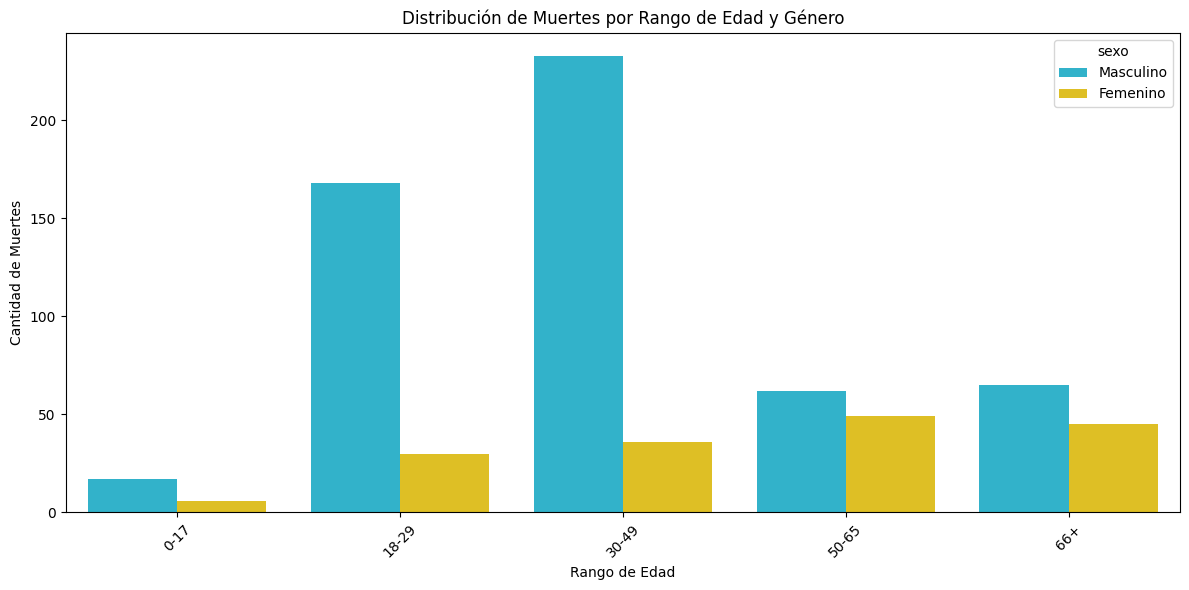

In [230]:
# filtramos los sd de genero
victimas_completo_df_f = victimas_completo_df[victimas_completo_df['sexo']!='Sd']
# Set the figure size
plt.figure(figsize=(12, 6))

# Define the palette dictionary
palette_dict = {'Masculino': '#19c3e3', 'Femenino': '#fdd306','Sd': '#717170'}

# Plot the countplot with hue set to 'sexo' and using the palette dictionary
sns.countplot(x='rango_edad', hue='sexo', data=victimas_completo_df_f, palette=palette_dict)

# Set the title and labels
plt.title('Distribución de Muertes por Rango de Edad y Género')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Muertes')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


El gráfico representa la cantidad de muertes en diferentes grupos de edad y géneros.
- Por cada rango de edad hay dos barras, una para hombres (color azul) y otra para mujeres (color amarillo).
- El grupo de edad con la **mayor cantidad total de muertes es el rango de 30–59 años**.
- Dentro de este grupo, se observa una diferencia significativa entre géneros: hay más muertes en hombres que en mujeres.
- En los demás grupos de edad, las cifras son relativamente similares entre ambos géneros.
- El grupo de edad con menos muertes es el rango infantil/juvenil (0–17 años).
**Conclusiones:**
- La mayoría de las muertes ocurren en adultos jóvenes y de mediana edad (30–59 años).
- Es importante destacar las diferencias de género.

### F. Evolución del porcentaje de muertes por victima.victima
Vamos a ahora analizar el porcentaje de muertes por tipo de victima

In [231]:
victimas_completo_df.victima.value_counts()

victima
Moto         303
Peaton       267
Auto          94
Bicicleta     29
Sd             9
Cargas         7
Pasajeros      5
Movil          3
Name: count, dtype: int64

In [232]:
unique_victimas = victimas_completo_df['victima'].unique()
unique_victimas

array(['Moto', 'Auto', 'Peaton', 'Sd', 'Cargas', 'Bicicleta', 'Pasajeros',
       'Movil'], dtype=object)

Vamos a representar para cada tipo de victima, su porcentaje y evolución del total de muertes

In [233]:
# Vamos a filtrar los valores sin datos
filtered_df = victimas_completo_df[victimas_completo_df['victima'] != 'Sd']

# Creamos una tabla pivot
pivot_table = filtered_df.pivot_table(index='victima', columns='anio', aggfunc='size', fill_value=0)

# Calculamos el total para cada año
year_total = pivot_table.sum(axis=0)

# Calculamos el porcentaje para cada combinación, tipo año
percentage_table = pivot_table.apply(lambda x: round((x / year_total) * 100,2), axis=1)

# Sumamos el total para cada fila
pivot_table.loc['Total'] = year_total

# Agreganmos los porcentajes
percentage_table.loc['Percentage'] = 100

pivot_table.T

victima,Auto,Bicicleta,Cargas,Moto,Movil,Pasajeros,Peaton,Total
anio,,,,,,,,
2016,18,4,3,65,1,1,49,141
2017,25,4,2,56,0,0,49,136
2018,17,3,2,57,2,2,66,149
2019,11,7,0,50,0,1,35,104
2020,12,5,0,29,0,0,35,81
2021,11,6,0,46,0,1,33,97


### En porcentajes del total del año

In [234]:
percentage_table.T

victima,Auto,Bicicleta,Cargas,Moto,Movil,Pasajeros,Peaton,Percentage
anio,,,,,,,,
2016,12.77,2.84,2.13,46.10,0.71,0.71,34.75,100.0
2017,18.38,2.94,1.47,41.18,0.00,0.00,36.03,100.0
2018,11.41,2.01,1.34,38.26,1.34,1.34,44.30,100.0
2019,10.58,6.73,0.00,48.08,0.00,0.96,33.65,100.0
2020,14.81,6.17,0.00,35.80,0.00,0.00,43.21,100.0
2021,11.34,6.19,0.00,47.42,0.00,1.03,34.02,100.0


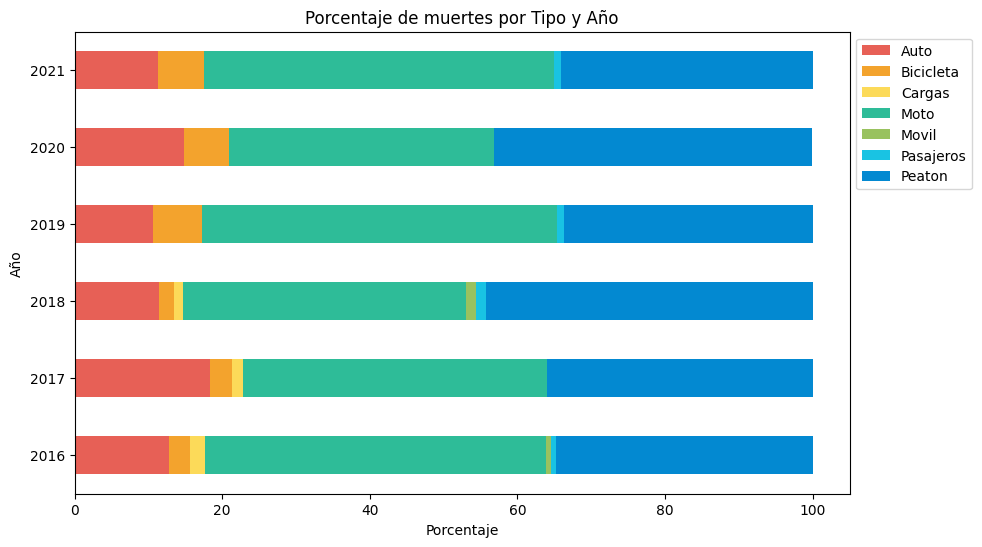

In [236]:
# Plot stacked percentage bar chart horizontally with custom palette
ax = percentage_table.drop('Percentage').T.plot(kind='barh', stacked=True, figsize=(10, 6), color=ColoresBA_claros)

# Set labels and title
ax.set_xlabel('Porcentaje')
ax.set_ylabel('Año')
ax.set_title('Porcentaje de muertes por Tipo y Año')

# Add legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Show plot
plt.show()

El gráfico representa el porcentaje de muertes por tipo (como “Auto”, “Moto”, “Peatones”, etc.) y año.
Los tipos de muertes incluidos son: Auto, Bicicleta, Cargas, Moto, Movil, Pasajeros y Peatones.
- A lo largo de los años, se observan cambios en la distribución de muertes en diferentes categorías.
**Evolución Específica**:
- **Moto**: En 2016, la categoría “Moto” tenía un porcentaje significativo de muertes. Sin embargo, desde el 2016 al 2020 ha disminuido constantemente cada año. 
    Para luego en 2021, crecer nuevamente al 47% que es el valor de origne. 
- **Peatones**: Las muertes de peatones también disminuyen desde el 2016 al 2020, pero a partir del 2021 vuelve a escalar la cantidad de muertes porcentuales de peatones frente al total, aunque no tan drásticamente como las de motociclistas. 

### G. Ocurrencia de muertes por franja horaria
Vamos a ahora analizar si hay una franja horaria o momento del dia en que ocurran mas muertes  y luego sumaremos a este análisis la segmentación por tipo de victima, en particular para los peatones y motociclistas que representan el 87% de las victimas fatales

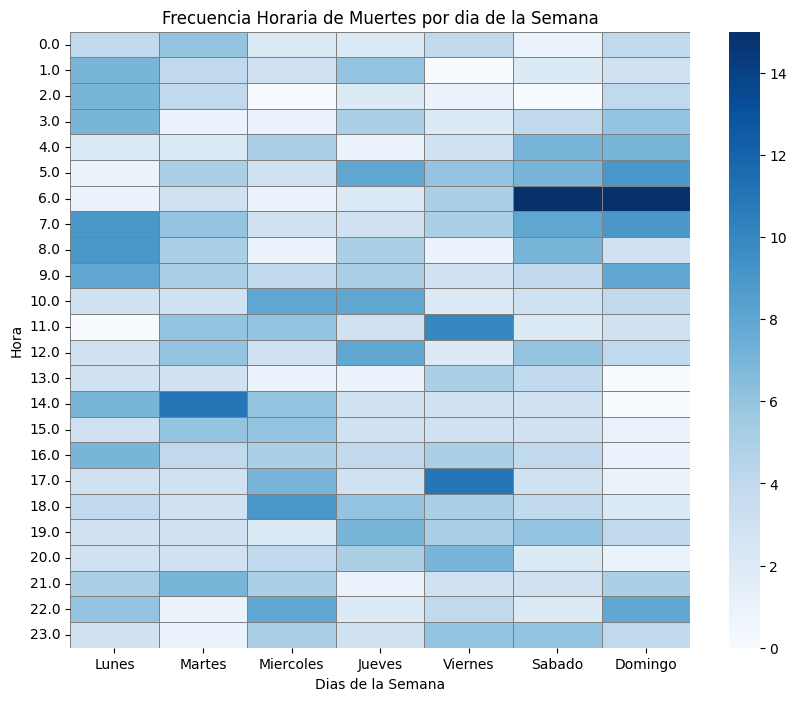

In [237]:
victimas_completo_df['fecha'] = pd.to_datetime(victimas_completo_df['fecha'])
# Extraemos el dia de la semana de la columna fecha
victimas_completo_df['day_of_week'] = victimas_completo_df['fecha'].dt.dayofweek
# Agrupamos por dia de la semana, y contamos la cantidad de muertes
grouped_df = victimas_completo_df.groupby(['day_of_week', 'hora_int']).size().reset_index(name='death_count')

# Creamos una tabla Pivot para crear un heatmap-friendly format
pivot_df = grouped_df.pivot_table(index='hora_int', columns='day_of_week', values='death_count', fill_value=0)

# Graficamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='Blues', linewidths=0.5, linecolor='grey')
plt.title('Frecuencia Horaria de Muertes por dia de la Semana')
plt.xlabel('Dias de la Semana')
plt.ylabel('Hora')
plt.xticks(np.arange(7) + 0.5, ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'])
plt.yticks(rotation=0)
plt.show()

**Observaciones:**
**Intensidad de Color**:

- La intensidad de color en el gráfico representa la **frecuencia de muertes** durante diferentes horas del día.
- Tonos más oscuros indican **frecuencias más altas**, mientras que tonos más claros corresponden a **frecuencias más bajas**.

**Conclusiones**
**Días de Semana vs. Fin de Semana**:

- En **días de semana (lunes a viernes)**:
  - El gráfico muestra un **patrón consistente** con frecuencias de muerte más altas durante las **horas de la mañana** (alrededor de las 8:00 a.m. a las 10:00 a.m.) y las **horas de la tarde** (alrededor de las 6:00 p.m. a las 8:00 p.m.).
  - Este patrón se alinea con las **horas típicas de viaje**, sugiriendo que los accidentes o incidentes pueden ocurrir con más frecuencia durante estos momentos.
- En **fin de semana (sábado y domingo)**:
  - El patrón es **diferente**:
    - **Sábado**:
      - Los tonos más oscuros se extienden desde la **tarde** (alrededor de las 2:00 p.m.) hasta la **noche** (alrededor de las 8:00 p.m.).
      - Esto podría estar relacionado con actividades de ocio, eventos al aire libre o vida nocturna.
    - **Domingo**:
      - Los tonos más oscuros están **distribuidos a lo largo del día**, sin horas pico distintas.
      - Esto sugiere una **distribución más uniforme** de muertes los domingos.


### Realizamos el mismo análisis pero enfocándonos exclusivamente en las muertes de motociclistas 

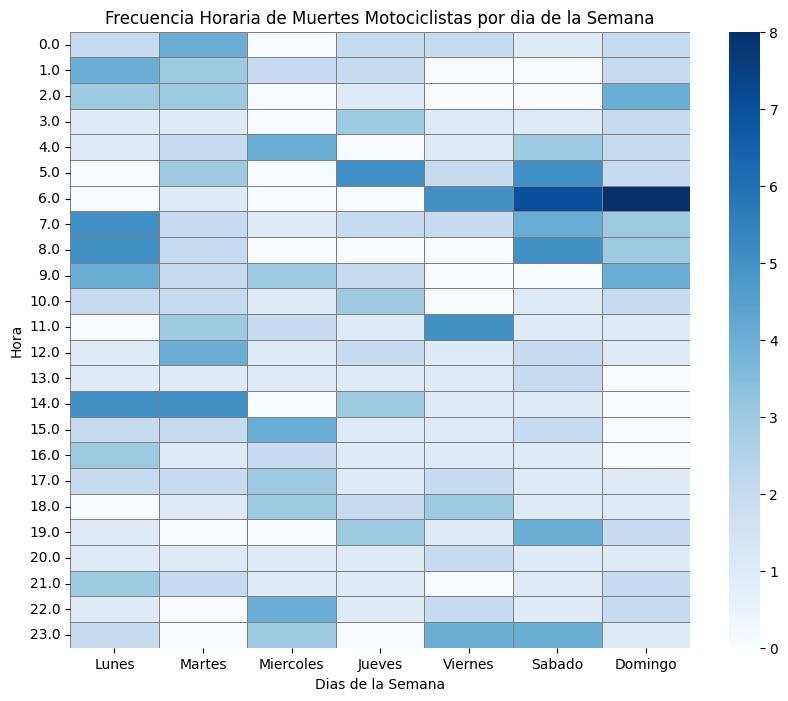

In [238]:
# Filtramos solo por los motociclistas
motos_df = victimas_completo_df[victimas_completo_df['hecho_victima'] == 'Moto']

# Agrupamos por dia de la semana, y contamos la cantidad de muertes
grouped_df = motos_df.groupby(['day_of_week', 'hora_int']).size().reset_index(name='death_count')

# Creamos una tabla Pivot para crear un heatmap-friendly format
pivot_df = grouped_df.pivot_table(index='hora_int', columns='day_of_week', values='death_count', fill_value=0)

# Graficamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='Blues', linewidths=0.5, linecolor='grey')
plt.title('Frecuencia Horaria de Muertes Motociclistas por dia de la Semana')
plt.xlabel('Dias de la Semana')
plt.ylabel('Hora')
plt.xticks(np.arange(7) + 0.5, ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'])
plt.yticks(rotation=0)
plt.show()

**Frecuencia Horaria de Muertes de Motociclistas por Día de la Semana** :

1. **Descripción**:
   - Se visualizan datos relacionados con la frecuencia de muertes basada en la hora del día y el día de la semana.
   - Cada celda en el mapa de calor representa una hora específica (eje y) en un día específico de la semana (eje x).
   - La intensidad del color dentro de cada celda indica la frecuencia de muertes durante esa hora y día.

2. **Observaciones Clave**:
   - **Días con Frecuencias Más Altas**:
     - **Sábado**:
       - Las celdas azules más oscuras están concentradas alrededor del rango de **18:00-19:00** horas.
       - Esto sugiere que las tardes de sábado tienen una **alta incidencia de muertes**.
       - Posibles razones podrían incluir actividades nocturnas, reuniones o accidentes durante horas de ocio.
     - **Domingo**:
       - Similar al sábado, las celdas azules oscuras aparecen alrededor del rango de **17:00-18:00** horas.
       - Las tardes de domingo también experimentan una **mayor frecuencia de muertes**.
       - Nuevamente, esto podría estar relacionado con diversos factores como accidentes de tráfico, actividades al aire libre o emergencias de salud.

3. **Conclusiones**:
   - **Horas Pico**:
     - Sábado por la noche y Domingo por la noche son las franjas horarias con mayor cantidad de accidentes fatales.
    - Las campañas de seguridad dirigidas pueden enfocarse en educar al público sobre los riesgos durante franjas horarias específicas.
    - Por ejemplo, promover prácticas de conducción segura durante las noches de fin de semana.

### Muertes de Peatones

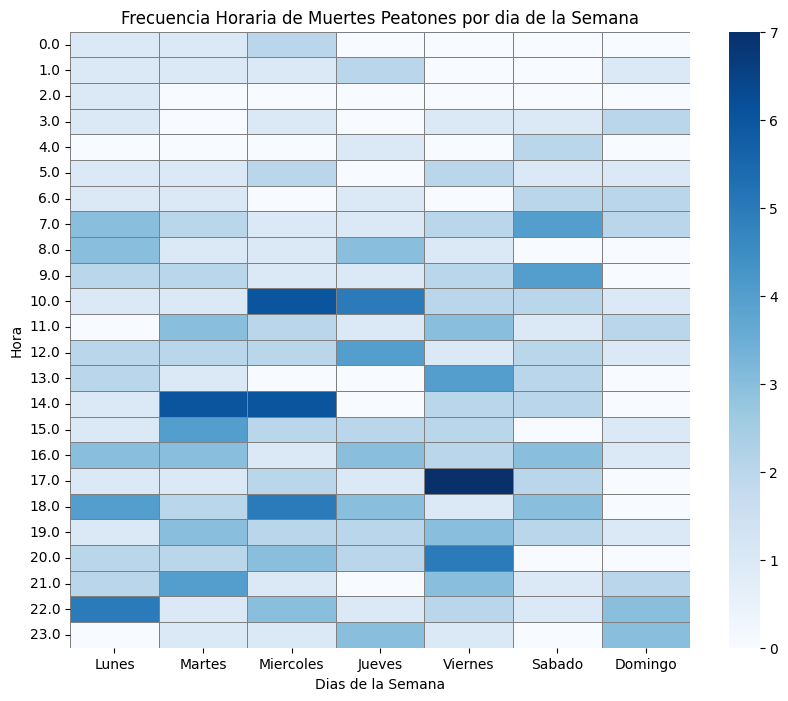

In [75]:
# Filtramos solo por los peatones
peatones_df = victimas_completo_df[victimas_completo_df['hecho_victima'] == 'Peaton']

# Agrupamos por dia de la semana, y contamos la cantidad de muertes
grouped_df = peatones_df.groupby(['day_of_week', 'hora_int']).size().reset_index(name='death_count')

# Creamos una tabla Pivot para crear un heatmap-friendly format
pivot_df = grouped_df.pivot_table(index='hora_int', columns='day_of_week', values='death_count', fill_value=0)

# Graficamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='Blues', linewidths=0.5, linecolor='grey')
plt.title('Frecuencia Horaria de Muertes Peatones por dia de la Semana')
plt.xlabel('Dias de la Semana')
plt.ylabel('Hora')
plt.xticks(np.arange(7) + 0.5, ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'])
plt.yticks(rotation=0)
plt.show()

1. **Descripción**:
   - Se visualizan datos relacionados con la **frecuencia de muertes de peatones** según la **hora del día** y el **día de la semana**.
   - Cada celda en el mapa de calor representa una **hora específica** (eje y) en un **día específico de la semana** (eje x).
   - La **intensidad del color** dentro de cada celda indica la **frecuencia de muertes de peatones** durante esa hora y día.

2. **Observaciones Clave**:
   - **Días con Mayores Frecuencias**:
     - **Miércoles**:
       - Las celdas de color azul más oscuro aparecen alrededor del rango de **18:00 a 19:00** horas.
       - Esto sugiere que las tardes de miércoles tienen una **alta incidencia de muertes de peatones**.
    - **Viernes**:
       - Otro pico ocurre entre las **14:00 y las 15:00** horas.
       - Las tardes de viernes también experimentan una **mayor frecuencia de muertes de peatones**.
      
3. **Conclusiones**:
    - Las **tardes de miércoles** y los **viernes por la tarde** son periodos críticos.

#### Guardamos el victimas_final_df para utilizarlo en nuestra Database de MySQL que se conectará con Power BI para el desarrollo de nuestro Dashboard

In [239]:
# Ruta donde guardamos el file y el name_file
victimas_completo = 'data\\victimas_completo.csv'
# Guardamos el dataframe en un archivo .csv
victimas_completo_df.to_csv(victimas_completo, index=False)
# Mensaje de confirmación de escritura
print(f'El victimas_completo_df fue guardado en {victimas_completo}')

El victimas_completo_df fue guardado en data\victimas_completo.csv
